### Stock Price Prediction Based on News Feed and Twitter Sentiment Analysis

COMP 5360, University of Utah, http://datasciencecourse.net/

Project Version: Final Submission

Due Date: Sunday April 21, 2019

Names: Ashish Lakhmani, Kanika Moondra, Sahaj Chhabra

Email addresses: u1217839@utah.edu, u1228166@utah.edu, u1228559@utah.edu

Video Link: https://youtu.be/gdrZsCNpyS8

### Background and Motivation:

In today's world finance is becoming increasingly about technology and data science. In that same vein, this project aims to be a proof of concept for the analyzing of social media to get the public opinion of a Stock.

With a simple tweet, snapchat's stock fell dramatically. This suggests that social media can have a huge impact on the stock market. By analyzing these trends and monitoring public opinion of companies we built a predictive model to exploit market inefficiencies and anticipate changes in the market before they happen.
Because machine learning algorithms can pull data automatically from these sources and can analyze them in real-time, this could revolutionize the finance industry as a whole.

Stock prices are considered as a basic measure in the prediction of the stock market. Well defined strategies are used for earning high profit. However, level of accuracy in prediction is not very satisfactory. One way of improving this prediction process is by incorporating the sentiments and moods of the public from Twitter along with News events at that period of time. In this project, we have performed sentiment analysis from the Tweets related to the stock market as well as News feeds.

Recently Twitter has been used to detect and forecast trading and investing to break critical financial news faster. Thus, if sentiments are correctly categorized and their polarity is correctly determined they can be helpful in enhancing a company’s performance and making its investors(our focused audience) happy. This project will aim in gathering the public sentiment, as expressed in large scale collections of daily Twitter posts and News feeds collected from stock related websites and predicting the stock prices based on the gathered data.

### Project Objectives

Understanding the use of applying sentiment analysis on Company Tweets and News headlines for a given time period? 

How does the sentiment scores impact the stock prices for that time period?

How well we are able to understand the company's financial performance in market based on the public opinion?

How well does the sentiment scores fit with the price derivation to predict the stock prices?

### IMPORTING LIBRARIES

In [1]:
import pandas as pd
import glob
import statsmodels.formula.api as sm
from sklearn import linear_model
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import numpy as np
import string
import re
import nltk
nltk.download('wordnet')
import nltk
nltk.download('stopwords')
from sklearn import preprocessing
import seaborn as sns
import scipy as sc
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,30)

[nltk_data] Downloading package wordnet to C:\Users\Ashish
[nltk_data]     Lakhmani\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Ashish
[nltk_data]     Lakhmani\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### TWITTER SENTIMENT ANALYSIS

In [2]:
df = pd.read_csv('Apple_New.csv',encoding='latin-1') #header=None, names=['Date_time', 'Tweets'])
#df['Date'] = df['Date_time']

In [3]:
df.head()

Date_Time        Date  \
0  2019-03-16 23:59:00  2019-03-16   
1  2019-03-16 23:51:38  2019-03-16   
2  2019-03-16 23:51:37  2019-03-16   
3  2019-03-16 23:47:48  2019-03-16   
4  2019-03-16 23:44:06  2019-03-16   

                                              Tweets  
0  @MelaynaLokosky @WintonCapPtnrs So does this m...  
1  Brokerages Set Apple Inc. $AAPL Price Target a...  
2  Brokerages Set Apple Inc. $AAPL Target Price a...  
3  Join @RobinhoodApp and we'll both get a stock ...  
4  Join @RobinhoodApp and we'll both get a stock ...

In [4]:
df = df.drop(["Date_Time"], axis=1)

In [5]:
df.head()

Date                                             Tweets
0  2019-03-16  @MelaynaLokosky @WintonCapPtnrs So does this m...
1  2019-03-16  Brokerages Set Apple Inc. $AAPL Price Target a...
2  2019-03-16  Brokerages Set Apple Inc. $AAPL Target Price a...
3  2019-03-16  Join @RobinhoodApp and we'll both get a stock ...
4  2019-03-16  Join @RobinhoodApp and we'll both get a stock ...

### Data Cleaning

We then performed data cleaning over the raw data that we got from tweets as well as news, we performed the following functions to achieve clean data:

Removing punctuations

Removing new line

Removing https at the end of text data

Removing numbers

Removing ASCII values

Applied Tokenizer

Applied Lemmatizer

Removed stopwords.


In [6]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [7]:
# Removing all punctuations
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', ' ', text)
    return text

df['Tweet_punct'] = df['Tweets'].apply(lambda x: remove_punct(x))
df.head(20)

Date                                             Tweets  \
0   2019-03-16  @MelaynaLokosky @WintonCapPtnrs So does this m...   
1   2019-03-16  Brokerages Set Apple Inc. $AAPL Price Target a...   
2   2019-03-16  Brokerages Set Apple Inc. $AAPL Target Price a...   
3   2019-03-16  Join @RobinhoodApp and we'll both get a stock ...   
4   2019-03-16  Join @RobinhoodApp and we'll both get a stock ...   
5   2019-03-16  Study study study. Saturday night and I choose...   
6   2019-03-16  @jonnajarian @petenajarian pass this along to ...   
7   2019-03-16  Q1 Earnings Season Gets Underway $AZO $NKE $AA...   
8   2019-03-16  $AAPL $FXCOF - Hey 'Tim Apple' - Watch Foxconn...   
9   2019-03-16  Apple $AAPL Now Covered by Cowen https://t.co/...   
10  2019-03-16  Cowen Begins Coverage on Apple $AAPL  https://...   
11  2019-03-16  __#AAPL Money Magnet example was for $AAPL  Pr...   
12  2019-03-16  Patience Paid Off with this $AAPL #Swingtrade!...   
13  2019-03-16  Join @RobinhoodApp and we'll both get a stock ...   
14  2019-03-16  $AAPL Apple Watch detects irregular heart beat...   
15  2019-03-16  $AAPL Apple Watch detects irregular heart beat...   
16  2019-03-16  Breaking insight: Apple $AAPL watch cannot scr...   
17  2019-03-16  $AAPL https://t.co/IphGExWbLS\nAlmost to 190. ...   
18  2019-03-16  Join @RobinhoodApp and we'll both get a stock ...   
19  2019-03-16  $SPY https://t.co/qdxGOge8mX\nThat was a fun w...   

                                          Tweet_punct  
0   MelaynaLokosky WintonCapPtnrs So does this mea...  
1   Brokerages Set Apple Inc AAPL Price Target at ...  
2   Brokerages Set Apple Inc AAPL Target Price at ...  
3   Join RobinhoodApp and well both get a stock li...  
4   Join RobinhoodApp and well both get a stock li...  
5   Study study study Saturday night and I choose ...  
6   jonnajarian petenajarian pass this along to St...  
7   Q  Earnings Season Gets Underway AZO NKE AAPL ...  
8   AAPL FXCOF  Hey Tim Apple  Watch Foxconn https...  
9   Apple AAPL Now Covered by Cowen httpstcoPAFBMm...  
10  Cowen Begins Coverage on Apple AAPL  httpstco ...  
11  AAPL Money Magnet example was for AAPL  Price ...  
12  Patience Paid Off with this AAPL Swingtrade Ch...  
13  Join RobinhoodApp and well both get a stock li...  
14  AAPL Apple Watch detects irregular heart beat ...  
15  AAPL Apple Watch detects irregular heart beat ...  
16  Breaking insight Apple AAPL watch cannot scree...  
17  AAPL httpstcoIphGExWbLS\nAlmost to   That was ...  
18  Join RobinhoodApp and well both get a stock li...  
19  SPY httpstcoqdxGOge mX\nThat was a fun week Wi...

In [8]:
# removing newline or \n expressions.
df["Tweet_nonewline"] = [tweet.replace('\n'," ").strip() for tweet in df["Tweet_punct"]]
df.head(20)

Date                                             Tweets  \
0   2019-03-16  @MelaynaLokosky @WintonCapPtnrs So does this m...   
1   2019-03-16  Brokerages Set Apple Inc. $AAPL Price Target a...   
2   2019-03-16  Brokerages Set Apple Inc. $AAPL Target Price a...   
3   2019-03-16  Join @RobinhoodApp and we'll both get a stock ...   
4   2019-03-16  Join @RobinhoodApp and we'll both get a stock ...   
5   2019-03-16  Study study study. Saturday night and I choose...   
6   2019-03-16  @jonnajarian @petenajarian pass this along to ...   
7   2019-03-16  Q1 Earnings Season Gets Underway $AZO $NKE $AA...   
8   2019-03-16  $AAPL $FXCOF - Hey 'Tim Apple' - Watch Foxconn...   
9   2019-03-16  Apple $AAPL Now Covered by Cowen https://t.co/...   
10  2019-03-16  Cowen Begins Coverage on Apple $AAPL  https://...   
11  2019-03-16  __#AAPL Money Magnet example was for $AAPL  Pr...   
12  2019-03-16  Patience Paid Off with this $AAPL #Swingtrade!...   
13  2019-03-16  Join @RobinhoodApp and we'll both get a stock ...   
14  2019-03-16  $AAPL Apple Watch detects irregular heart beat...   
15  2019-03-16  $AAPL Apple Watch detects irregular heart beat...   
16  2019-03-16  Breaking insight: Apple $AAPL watch cannot scr...   
17  2019-03-16  $AAPL https://t.co/IphGExWbLS\nAlmost to 190. ...   
18  2019-03-16  Join @RobinhoodApp and we'll both get a stock ...   
19  2019-03-16  $SPY https://t.co/qdxGOge8mX\nThat was a fun w...   

                                          Tweet_punct  \
0   MelaynaLokosky WintonCapPtnrs So does this mea...   
1   Brokerages Set Apple Inc AAPL Price Target at ...   
2   Brokerages Set Apple Inc AAPL Target Price at ...   
3   Join RobinhoodApp and well both get a stock li...   
4   Join RobinhoodApp and well both get a stock li...   
5   Study study study Saturday night and I choose ...   
6   jonnajarian petenajarian pass this along to St...   
7   Q  Earnings Season Gets Underway AZO NKE AAPL ...   
8   AAPL FXCOF  Hey Tim Apple  Watch Foxconn https...   
9   Apple AAPL Now Covered by Cowen httpstcoPAFBMm...   
10  Cowen Begins Coverage on Apple AAPL  httpstco ...   
11  AAPL Money Magnet example was for AAPL  Price ...   
12  Patience Paid Off with this AAPL Swingtrade Ch...   
13  Join RobinhoodApp and well both get a stock li...   
14  AAPL Apple Watch detects irregular heart beat ...   
15  AAPL Apple Watch detects irregular heart beat ...   
16  Breaking insight Apple AAPL watch cannot scree...   
17  AAPL httpstcoIphGExWbLS\nAlmost to   That was ...   
18  Join RobinhoodApp and well both get a stock li...   
19  SPY httpstcoqdxGOge mX\nThat was a fun week Wi...   

                                      Tweet_nonewline  
0   MelaynaLokosky WintonCapPtnrs So does this mea...  
1   Brokerages Set Apple Inc AAPL Price Target at ...  
2   Brokerages Set Apple Inc AAPL Target Price at ...  
3   Join RobinhoodApp and well both get a stock li...  
4   Join RobinhoodApp and well both get a stock li...  
5   Study study study Saturday night and I choose ...  
6   jonnajarian petenajarian pass this along to St...  
7   Q  Earnings Season Gets Underway AZO NKE AAPL ...  
8   AAPL FXCOF  Hey Tim Apple  Watch Foxconn https...  
9   Apple AAPL Now Covered by Cowen httpstcoPAFBMm...  
10  Cowen Begins Coverage on Apple AAPL  httpstco ...  
11  AAPL Money Magnet example was for AAPL  Price ...  
12  Patience Paid Off with this AAPL Swingtrade Ch...  
13  Join RobinhoodApp and well both get a stock li...  
14  AAPL Apple Watch detects irregular heart beat ...  
15  AAPL Apple Watch detects irregular heart beat ...  
16  Breaking insight Apple AAPL watch cannot scree...  
17  AAPL httpstcoIphGExWbLS Almost to   That was a...  
18  Join RobinhoodApp and well both get a stock li...  
19  SPY httpstcoqdxGOge mX That was a fun week Wil...

In [9]:
# Removing http url from every tweet substitued with space
df["Tweet_wohttp"] = [re.sub(r"http\S+", " ", text) for text in df["Tweet_nonewline"]]
df.head()

Date                                             Tweets  \
0  2019-03-16  @MelaynaLokosky @WintonCapPtnrs So does this m...   
1  2019-03-16  Brokerages Set Apple Inc. $AAPL Price Target a...   
2  2019-03-16  Brokerages Set Apple Inc. $AAPL Target Price a...   
3  2019-03-16  Join @RobinhoodApp and we'll both get a stock ...   
4  2019-03-16  Join @RobinhoodApp and we'll both get a stock ...   

                                         Tweet_punct  \
0  MelaynaLokosky WintonCapPtnrs So does this mea...   
1  Brokerages Set Apple Inc AAPL Price Target at ...   
2  Brokerages Set Apple Inc AAPL Target Price at ...   
3  Join RobinhoodApp and well both get a stock li...   
4  Join RobinhoodApp and well both get a stock li...   

                                     Tweet_nonewline  \
0  MelaynaLokosky WintonCapPtnrs So does this mea...   
1  Brokerages Set Apple Inc AAPL Price Target at ...   
2  Brokerages Set Apple Inc AAPL Target Price at ...   
3  Join RobinhoodApp and well both get a stock li...   
4  Join RobinhoodApp and well both get a stock li...   

                                        Tweet_wohttp  
0  MelaynaLokosky WintonCapPtnrs So does this mea...  
1  Brokerages Set Apple Inc AAPL Price Target at ...  
2  Brokerages Set Apple Inc AAPL Target Price at ...  
3  Join RobinhoodApp and well both get a stock li...  
4  Join RobinhoodApp and well both get a stock li...

In [10]:
# Removing numbers
df["Tweet_nonum"] = [re.sub("\d+", " ", text) for text in df["Tweet_wohttp"]]
df.head(20)

Date                                             Tweets  \
0   2019-03-16  @MelaynaLokosky @WintonCapPtnrs So does this m...   
1   2019-03-16  Brokerages Set Apple Inc. $AAPL Price Target a...   
2   2019-03-16  Brokerages Set Apple Inc. $AAPL Target Price a...   
3   2019-03-16  Join @RobinhoodApp and we'll both get a stock ...   
4   2019-03-16  Join @RobinhoodApp and we'll both get a stock ...   
5   2019-03-16  Study study study. Saturday night and I choose...   
6   2019-03-16  @jonnajarian @petenajarian pass this along to ...   
7   2019-03-16  Q1 Earnings Season Gets Underway $AZO $NKE $AA...   
8   2019-03-16  $AAPL $FXCOF - Hey 'Tim Apple' - Watch Foxconn...   
9   2019-03-16  Apple $AAPL Now Covered by Cowen https://t.co/...   
10  2019-03-16  Cowen Begins Coverage on Apple $AAPL  https://...   
11  2019-03-16  __#AAPL Money Magnet example was for $AAPL  Pr...   
12  2019-03-16  Patience Paid Off with this $AAPL #Swingtrade!...   
13  2019-03-16  Join @RobinhoodApp and we'll both get a stock ...   
14  2019-03-16  $AAPL Apple Watch detects irregular heart beat...   
15  2019-03-16  $AAPL Apple Watch detects irregular heart beat...   
16  2019-03-16  Breaking insight: Apple $AAPL watch cannot scr...   
17  2019-03-16  $AAPL https://t.co/IphGExWbLS\nAlmost to 190. ...   
18  2019-03-16  Join @RobinhoodApp and we'll both get a stock ...   
19  2019-03-16  $SPY https://t.co/qdxGOge8mX\nThat was a fun w...   

                                          Tweet_punct  \
0   MelaynaLokosky WintonCapPtnrs So does this mea...   
1   Brokerages Set Apple Inc AAPL Price Target at ...   
2   Brokerages Set Apple Inc AAPL Target Price at ...   
3   Join RobinhoodApp and well both get a stock li...   
4   Join RobinhoodApp and well both get a stock li...   
5   Study study study Saturday night and I choose ...   
6   jonnajarian petenajarian pass this along to St...   
7   Q  Earnings Season Gets Underway AZO NKE AAPL ...   
8   AAPL FXCOF  Hey Tim Apple  Watch Foxconn https...   
9   Apple AAPL Now Covered by Cowen httpstcoPAFBMm...   
10  Cowen Begins Coverage on Apple AAPL  httpstco ...   
11  AAPL Money Magnet example was for AAPL  Price ...   
12  Patience Paid Off with this AAPL Swingtrade Ch...   
13  Join RobinhoodApp and well both get a stock li...   
14  AAPL Apple Watch detects irregular heart beat ...   
15  AAPL Apple Watch detects irregular heart beat ...   
16  Breaking insight Apple AAPL watch cannot scree...   
17  AAPL httpstcoIphGExWbLS\nAlmost to   That was ...   
18  Join RobinhoodApp and well both get a stock li...   
19  SPY httpstcoqdxGOge mX\nThat was a fun week Wi...   

                                      Tweet_nonewline  \
0   MelaynaLokosky WintonCapPtnrs So does this mea...   
1   Brokerages Set Apple Inc AAPL Price Target at ...   
2   Brokerages Set Apple Inc AAPL Target Price at ...   
3   Join RobinhoodApp and well both get a stock li...   
4   Join RobinhoodApp and well both get a stock li...   
5   Study study study Saturday night and I choose ...   
6   jonnajarian petenajarian pass this along to St...   
7   Q  Earnings Season Gets Underway AZO NKE AAPL ...   
8   AAPL FXCOF  Hey Tim Apple  Watch Foxconn https...   
9   Apple AAPL Now Covered by Cowen httpstcoPAFBMm...   
10  Cowen Begins Coverage on Apple AAPL  httpstco ...   
11  AAPL Money Magnet example was for AAPL  Price ...   
12  Patience Paid Off with this AAPL Swingtrade Ch...   
13  Join RobinhoodApp and well both get a stock li...   
14  AAPL Apple Watch detects irregular heart beat ...   
15  AAPL Apple Watch detects irregular heart beat ...   
16  Breaking insight Apple AAPL watch cannot scree...   
17  AAPL httpstcoIphGExWbLS Almost to   That was a...   
18  Join RobinhoodApp and well both get a stock li...   
19  SPY httpstcoqdxGOge mX That was a fun week Wil...   

                                         Tweet_wohttp  \
0   MelaynaLokosky WintonCapPtnrs So does this mea...   
1   Brokerages Set Apple Inc AAPL Price Target at 

In [11]:
#Removing ASCII values
df["Tweet_noascii"] = [re.sub(r'[^\x00-\x7F]+',' ', text) for text in df["Tweet_nonum"]]
df.head()

Date                                             Tweets  \
0  2019-03-16  @MelaynaLokosky @WintonCapPtnrs So does this m...   
1  2019-03-16  Brokerages Set Apple Inc. $AAPL Price Target a...   
2  2019-03-16  Brokerages Set Apple Inc. $AAPL Target Price a...   
3  2019-03-16  Join @RobinhoodApp and we'll both get a stock ...   
4  2019-03-16  Join @RobinhoodApp and we'll both get a stock ...   

                                         Tweet_punct  \
0  MelaynaLokosky WintonCapPtnrs So does this mea...   
1  Brokerages Set Apple Inc AAPL Price Target at ...   
2  Brokerages Set Apple Inc AAPL Target Price at ...   
3  Join RobinhoodApp and well both get a stock li...   
4  Join RobinhoodApp and well both get a stock li...   

                                     Tweet_nonewline  \
0  MelaynaLokosky WintonCapPtnrs So does this mea...   
1  Brokerages Set Apple Inc AAPL Price Target at ...   
2  Brokerages Set Apple Inc AAPL Target Price at ...   
3  Join RobinhoodApp and well both get a stock li...   
4  Join RobinhoodApp and well both get a stock li...   

                                        Tweet_wohttp  \
0  MelaynaLokosky WintonCapPtnrs So does this mea...   
1  Brokerages Set Apple Inc AAPL Price Target at ...   
2  Brokerages Set Apple Inc AAPL Target Price at ...   
3  Join RobinhoodApp and well both get a stock li...   
4  Join RobinhoodApp and well both get a stock li...   

                                         Tweet_nonum  \
0  MelaynaLokosky WintonCapPtnrs So does this mea...   
1  Brokerages Set Apple Inc AAPL Price Target at ...   
2  Brokerages Set Apple Inc AAPL Target Price at ...   
3  Join RobinhoodApp and well both get a stock li...   
4  Join RobinhoodApp and well both get a stock li...   

                                       Tweet_noascii  
0  MelaynaLokosky WintonCapPtnrs So does this mea...  
1  Brokerages Set Apple Inc AAPL Price Target at ...  
2  Brokerages Set Apple Inc AAPL Target Price at ...  
3  Join RobinhoodApp and well both get a stock li...  
4  Join RobinhoodApp and well both get a stock li...

In [12]:
# Applying Tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

df['Tweet_tokenized'] = df['Tweet_noascii'].apply(lambda x: tokenization(x.lower()))
df.head()

Date                                             Tweets  \
0  2019-03-16  @MelaynaLokosky @WintonCapPtnrs So does this m...   
1  2019-03-16  Brokerages Set Apple Inc. $AAPL Price Target a...   
2  2019-03-16  Brokerages Set Apple Inc. $AAPL Target Price a...   
3  2019-03-16  Join @RobinhoodApp and we'll both get a stock ...   
4  2019-03-16  Join @RobinhoodApp and we'll both get a stock ...   

                                         Tweet_punct  \
0  MelaynaLokosky WintonCapPtnrs So does this mea...   
1  Brokerages Set Apple Inc AAPL Price Target at ...   
2  Brokerages Set Apple Inc AAPL Target Price at ...   
3  Join RobinhoodApp and well both get a stock li...   
4  Join RobinhoodApp and well both get a stock li...   

                                     Tweet_nonewline  \
0  MelaynaLokosky WintonCapPtnrs So does this mea...   
1  Brokerages Set Apple Inc AAPL Price Target at ...   
2  Brokerages Set Apple Inc AAPL Target Price at ...   
3  Join RobinhoodApp and well both get a stock li...   
4  Join RobinhoodApp and well both get a stock li...   

                                        Tweet_wohttp  \
0  MelaynaLokosky WintonCapPtnrs So does this mea...   
1  Brokerages Set Apple Inc AAPL Price Target at ...   
2  Brokerages Set Apple Inc AAPL Target Price at ...   
3  Join RobinhoodApp and well both get a stock li...   
4  Join RobinhoodApp and well both get a stock li...   

                                         Tweet_nonum  \
0  MelaynaLokosky WintonCapPtnrs So does this mea...   
1  Brokerages Set Apple Inc AAPL Price Target at ...   
2  Brokerages Set Apple Inc AAPL Target Price at ...   
3  Join RobinhoodApp and well both get a stock li...   
4  Join RobinhoodApp and well both get a stock li...   

                                       Tweet_noascii  \
0  MelaynaLokosky WintonCapPtnrs So does this mea...   
1  Brokerages Set Apple Inc AAPL Price Target at ...   
2  Brokerages Set Apple Inc AAPL Target Price at ...   
3  Join RobinhoodApp and well both get a stock li...   
4  Join RobinhoodApp and well both get a stock li...   

                                     Tweet_tokenized  
0  [melaynalokosky, wintoncapptnrs, so, does, thi...  
1  [brokerages, set, apple, inc, aapl, price, tar...  
2  [brokerages, set, apple, inc, aapl, target, pr...  
3  [join, robinhoodapp, and, well, both, get, a, ...  
4  [join, robinhoodapp, and, well, both, get, a, ...

In [13]:
# Applying Lemmatizer
wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word, pos="v") for word in text]
    return text

df['Tweet_lemmatized'] = df['Tweet_tokenized'].apply(lambda x: lemmatizer(x))
df.head()

Date                                             Tweets  \
0  2019-03-16  @MelaynaLokosky @WintonCapPtnrs So does this m...   
1  2019-03-16  Brokerages Set Apple Inc. $AAPL Price Target a...   
2  2019-03-16  Brokerages Set Apple Inc. $AAPL Target Price a...   
3  2019-03-16  Join @RobinhoodApp and we'll both get a stock ...   
4  2019-03-16  Join @RobinhoodApp and we'll both get a stock ...   

                                         Tweet_punct  \
0  MelaynaLokosky WintonCapPtnrs So does this mea...   
1  Brokerages Set Apple Inc AAPL Price Target at ...   
2  Brokerages Set Apple Inc AAPL Target Price at ...   
3  Join RobinhoodApp and well both get a stock li...   
4  Join RobinhoodApp and well both get a stock li...   

                                     Tweet_nonewline  \
0  MelaynaLokosky WintonCapPtnrs So does this mea...   
1  Brokerages Set Apple Inc AAPL Price Target at ...   
2  Brokerages Set Apple Inc AAPL Target Price at ...   
3  Join RobinhoodApp and well both get a stock li...   
4  Join RobinhoodApp and well both get a stock li...   

                                        Tweet_wohttp  \
0  MelaynaLokosky WintonCapPtnrs So does this mea...   
1  Brokerages Set Apple Inc AAPL Price Target at ...   
2  Brokerages Set Apple Inc AAPL Target Price at ...   
3  Join RobinhoodApp and well both get a stock li...   
4  Join RobinhoodApp and well both get a stock li...   

                                         Tweet_nonum  \
0  MelaynaLokosky WintonCapPtnrs So does this mea...   
1  Brokerages Set Apple Inc AAPL Price Target at ...   
2  Brokerages Set Apple Inc AAPL Target Price at ...   
3  Join RobinhoodApp and well both get a stock li...   
4  Join RobinhoodApp and well both get a stock li...   

                                       Tweet_noascii  \
0  MelaynaLokosky WintonCapPtnrs So does this mea...   
1  Brokerages Set Apple Inc AAPL Price Target at ...   
2  Brokerages Set Apple Inc AAPL Target Price at ...   
3  Join RobinhoodApp and well both get a stock li...   
4  Join RobinhoodApp and well both get a stock li...   

                                     Tweet_tokenized  \
0  [melaynalokosky, wintoncapptnrs, so, does, thi...   
1  [brokerages, set, apple, inc, aapl, price, tar...   
2  [brokerages, set, apple, inc, aapl, target, pr...   
3  [join, robinhoodapp, and, well, both, get, a, ...   
4  [join, robinhoodapp, and, well, both, get, a, ...   

                                    Tweet_lemmatized  
0  [melaynalokosky, wintoncapptnrs, so, do, this,...  
1  [brokerages, set, apple, inc, aapl, price, tar...  
2  [brokerages, set, apple, inc, aapl, target, pr...  
3  [join, robinhoodapp, and, well, both, get, a, ...  
4  [join, robinhoodapp, and, well, both, get, a, ...

In [14]:
stopword = nltk.corpus.stopwords.words('english')

In [15]:
# Removing Stopwords
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
df['Tweet_nonstop'] = df['Tweet_lemmatized'].apply(lambda x: remove_stopwords(x))
df.head()

Date                                             Tweets  \
0  2019-03-16  @MelaynaLokosky @WintonCapPtnrs So does this m...   
1  2019-03-16  Brokerages Set Apple Inc. $AAPL Price Target a...   
2  2019-03-16  Brokerages Set Apple Inc. $AAPL Target Price a...   
3  2019-03-16  Join @RobinhoodApp and we'll both get a stock ...   
4  2019-03-16  Join @RobinhoodApp and we'll both get a stock ...   

                                         Tweet_punct  \
0  MelaynaLokosky WintonCapPtnrs So does this mea...   
1  Brokerages Set Apple Inc AAPL Price Target at ...   
2  Brokerages Set Apple Inc AAPL Target Price at ...   
3  Join RobinhoodApp and well both get a stock li...   
4  Join RobinhoodApp and well both get a stock li...   

                                     Tweet_nonewline  \
0  MelaynaLokosky WintonCapPtnrs So does this mea...   
1  Brokerages Set Apple Inc AAPL Price Target at ...   
2  Brokerages Set Apple Inc AAPL Target Price at ...   
3  Join RobinhoodApp and well both get a stock li...   
4  Join RobinhoodApp and well both get a stock li...   

                                        Tweet_wohttp  \
0  MelaynaLokosky WintonCapPtnrs So does this mea...   
1  Brokerages Set Apple Inc AAPL Price Target at ...   
2  Brokerages Set Apple Inc AAPL Target Price at ...   
3  Join RobinhoodApp and well both get a stock li...   
4  Join RobinhoodApp and well both get a stock li...   

                                         Tweet_nonum  \
0  MelaynaLokosky WintonCapPtnrs So does this mea...   
1  Brokerages Set Apple Inc AAPL Price Target at ...   
2  Brokerages Set Apple Inc AAPL Target Price at ...   
3  Join RobinhoodApp and well both get a stock li...   
4  Join RobinhoodApp and well both get a stock li...   

                                       Tweet_noascii  \
0  MelaynaLokosky WintonCapPtnrs So does this mea...   
1  Brokerages Set Apple Inc AAPL Price Target at ...   
2  Brokerages Set Apple Inc AAPL Target Price at ...   
3  Join RobinhoodApp and well both get a stock li...   
4  Join RobinhoodApp and well both get a stock li...   

                                     Tweet_tokenized  \
0  [melaynalokosky, wintoncapptnrs, so, does, thi...   
1  [brokerages, set, apple, inc, aapl, price, tar...   
2  [brokerages, set, apple, inc, aapl, target, pr...   
3  [join, robinhoodapp, and, well, both, get, a, ...   
4  [join, robinhoodapp, and, well, both, get, a, ...   

                                    Tweet_lemmatized  \
0  [melaynalokosky, wintoncapptnrs, so, do, this,...   
1  [brokerages, set, apple, inc, aapl, price, tar...   
2  [brokerages, set, apple, inc, aapl, target, pr...   
3  [join, robinhoodapp, and, well, both, get, a, ...   
4  [join, robinhoodapp, and, well, both, get, a, ...   

                                       Tweet_nonstop  
0  [melaynalokosky, wintoncapptnrs, mean, elonmus...  
1  [brokerages, set, apple, inc, aapl, price, tar...  
2  [brokerages, set, apple, inc, aapl, target, pr...  
3  [join, robinhoodapp, well, get, stock, like, a...  
4  [join, robinhoodapp, well, get, stock, like, a...

In [16]:
#Keeping just Text and Date
Apple_Data_Tweets = df.drop(["Tweets","Tweet_punct","Tweet_nonewline","Tweet_wohttp","Tweet_nonum","Tweet_noascii","Tweet_tokenized","Tweet_lemmatized"], axis=1)

In [17]:
Apple_Data_Tweets.head()

Date                                      Tweet_nonstop
0  2019-03-16  [melaynalokosky, wintoncapptnrs, mean, elonmus...
1  2019-03-16  [brokerages, set, apple, inc, aapl, price, tar...
2  2019-03-16  [brokerages, set, apple, inc, aapl, target, pr...
3  2019-03-16  [join, robinhoodapp, well, get, stock, like, a...
4  2019-03-16  [join, robinhoodapp, well, get, stock, like, a...

In [18]:
Apple_Data_Tweets['Year']=[d.split('-')[0] for d in Apple_Data_Tweets.Date]
Apple_Data_Tweets['Month']=[d.split('-')[1] for d in Apple_Data_Tweets.Date]
Apple_Data_Tweets['Day']=[d.split('-')[2] for d in Apple_Data_Tweets.Date]

In [19]:
Apple_Data_Tweets.head()

Date                                      Tweet_nonstop  Year Month  \
0  2019-03-16  [melaynalokosky, wintoncapptnrs, mean, elonmus...  2019    03   
1  2019-03-16  [brokerages, set, apple, inc, aapl, price, tar...  2019    03   
2  2019-03-16  [brokerages, set, apple, inc, aapl, target, pr...  2019    03   
3  2019-03-16  [join, robinhoodapp, well, get, stock, like, a...  2019    03   
4  2019-03-16  [join, robinhoodapp, well, get, stock, like, a...  2019    03   

  Day  
0  16  
1  16  
2  16  
3  16  
4  16

In [20]:
Apple_Data_Tweets = Apple_Data_Tweets.drop(['Date','Year'],axis=1)

In [21]:
Apple_Data_Tweets.head()

Tweet_nonstop Month Day
0  [melaynalokosky, wintoncapptnrs, mean, elonmus...    03  16
1  [brokerages, set, apple, inc, aapl, price, tar...    03  16
2  [brokerages, set, apple, inc, aapl, target, pr...    03  16
3  [join, robinhoodapp, well, get, stock, like, a...    03  16
4  [join, robinhoodapp, well, get, stock, like, a...    03  16

In [22]:
#Removing redundant Data and Grouping only by Month and Day.
final_dataset_Tweets = pd.DataFrame(data=None, index=None,columns=['Month','Day','Tweet_nonstop'])

In [23]:
final_dataset_Tweets = Apple_Data_Tweets.groupby(['Month', 'Day'])['Tweet_nonstop'].apply(list).reset_index()

In [24]:
final_dataset_Tweets.head()

Month Day                                      Tweet_nonstop
0    03  14  [[aapl, patent, automate, capture, image, data...
1    03  16  [[melaynalokosky, wintoncapptnrs, mean, elonmu...
2    03  17  [[join, robinhoodapp, well, get, stock, like, ...
3    03  18  [[watch, happen, naviavatar, broadcast, dow, a...
4    03  19  [[de, dis, mcd, nice, aapl, chk, swks, swn, ho...

In [25]:
#Converting List to Dictionary
def ltod(a):
    dic={}
    for i in range(len(a)):
        for j in a[i]:
            if j in dic:
                dic[j]+=1
            else:
                dic[j]=1
    return dic

In [26]:
final_dataset_Tweets['Tweet_nonstop']=final_dataset_Tweets['Tweet_nonstop'].apply(lambda x: ltod(x))

In [27]:
final_dataset_Tweets.head()

Month Day                                      Tweet_nonstop
0    03  14  {'aapl': 740, 'patent': 52, 'automate': 1, 'ca...
1    03  16  {'melaynalokosky': 1, 'wintoncapptnrs': 1, 'me...
2    03  17  {'join': 309, 'robinhoodapp': 303, 'well': 318...
3    03  18  {'watch': 68, 'happen': 6, 'naviavatar': 4, 'b...
4    03  19  {'de': 6, 'dis': 48, 'mcd': 2, 'nice': 18, 'aa...

In [28]:
#Calling Positive words List.
with open('positive_words.txt') as f:
    pos_lines = f.read().splitlines()
len(pos_lines)

2005

In [29]:
#Calling Negative words List.
with open('negative_words.txt') as f:
    neg_lines = f.read().splitlines()
len(neg_lines)

4781

In [30]:
#Calculating Positive Scores and Negative Scores
def pos_parity(x):
    pos_count=0
    total = sum(x.values())
    for i in pos_lines:
        if i in x:
            pos_count+=x[i]
    return float(pos_count/total)

In [31]:
def neg_parity(x):
    neg_count=0
    for i in neg_lines:
        if i in x:
            neg_count+=x[i]
    return float(neg_count/(sum(x.values())))

In [32]:
comb_word_tweet={}
len(final_dataset_Tweets.Tweet_nonstop)

32

In [33]:
#Performing Data Analysis on the Text to get information about the top 10 most used positive and negative words for tweets
for x in final_dataset_Tweets.Tweet_nonstop:
    for key in x:
        if key in neg_lines:
            if key in comb_word_tweet:
                comb_word_tweet[key] += x[key]
            else:
                comb_word_tweet[key] = x[key]

In [34]:
my_list_names = []
my_list_values = []
count = 0
for key, value in sorted(comb_word_tweet.items(), key=lambda item: item[1]):
    my_list_names.append(key)
    my_list_values.append(value)
    count += 1

print(my_list_names[-10:], my_list_values[-10:])

['pain', 'strike', 'fall', 'risk', 'resistance', 'mar', 'lose', 'miss', 'break', 'decline'] [125, 130, 135, 159, 168, 191, 231, 245, 578, 1205]


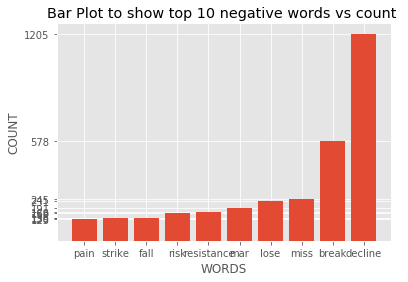

In [35]:
# Plotting the Bar Plot to show top 10 negative words vs count 
y=my_list_names[-10:]
plt.bar(y, height=my_list_values[-10:])
plt.xticks(my_list_names[-10:],my_list_names[-10:])
plt.yticks(my_list_values[-10:])
plt.xlabel("WORDS")
plt.ylabel("COUNT")
plt.title("Bar Plot to show top 10 negative words vs count ")
plt.show()

In [36]:
comb_word_tweet={}

In [37]:
for x in final_dataset_Tweets.Tweet_nonstop:
    for key in x:
        if key in pos_lines:
            if key in comb_word_tweet:
                comb_word_tweet[key] += x[key]
            else:
                comb_word_tweet[key] = x[key]

In [38]:
my_list_names = []
my_list_values = []

for key, value in sorted(comb_word_tweet.items(), key=lambda item: item[1]):
    my_list_names.append(key)
    my_list_values.append(value)
    count += 1

print(my_list_names[-10:], my_list_values[-10:])

['bullish', 'best', 'gain', 'good', 'win', 'top', 'great', 'well', 'like', 'free'] [326, 385, 401, 550, 560, 652, 681, 5332, 5889, 6361]


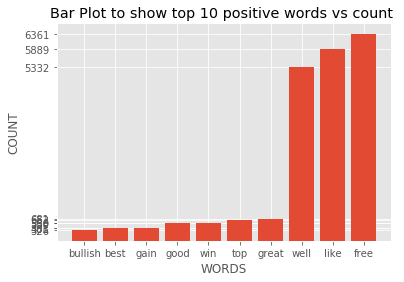

In [39]:
# Plotting the Bar Plot to show top 10 positive words vs count
y=my_list_names[-10:]
plt.bar(y, height=my_list_values[-10:])
plt.xticks(my_list_names[-10:],my_list_names[-10:])
plt.yticks(my_list_values[-10:])
plt.xlabel("WORDS")
plt.ylabel("COUNT")
plt.title("Bar Plot to show top 10 positive words vs count ")
plt.show()

In [40]:
#Sentiment Score Generator
final_dataset_Tweets['pos_parity_tweets']=final_dataset_Tweets['Tweet_nonstop'].apply(lambda x: pos_parity(x))

In [41]:
final_dataset_Tweets['neg_parity_tweets']=final_dataset_Tweets['Tweet_nonstop'].apply(lambda x: neg_parity(x))

In [42]:
final_dataset_Tweets

Month Day                                      Tweet_nonstop  \
0     03  14  {'aapl': 740, 'patent': 52, 'automate': 1, 'ca...   
1     03  16  {'melaynalokosky': 1, 'wintoncapptnrs': 1, 'me...   
2     03  17  {'join': 309, 'robinhoodapp': 303, 'well': 318...   
3     03  18  {'watch': 68, 'happen': 6, 'naviavatar': 4, 'b...   
4     03  19  {'de': 6, 'dis': 48, 'mcd': 2, 'nice': 18, 'aa...   
5     03  20  {'join': 346, 'robinhoodapp': 324, 'well': 342...   
6     03  21  {'jeffvandenburgh': 2, 'still': 68, 'place': 1...   
7     03  22  {'bravotrader': 2, 'algorithms': 2, 'scar': 4,...   
8     03  23  {'powerserious': 4, 'clown': 2, 'must': 4, 'du...   
9     03  24  {'join': 122, 'robinhoodapp': 120, 'well': 126...   
10    03  25  {'join': 54, 'robinhoodapp': 48, 'well': 66, '...   
11    03  26  {'qcom': 74, 'aapl': 1734, 'applequalcomm': 1,...   
12    03  27  {'apple': 354, 'aapl': 1080, 'long': 24, 'shor...   
13    03  28  {'join': 72, 'robinhoodapp': 66, 'well': 77, '...   
14    03  30  {'join': 36, 'robinhoodapp': 37, 'well': 38, '...   
15    03  31  {'weekly': 8, 'stock': 127, 'market': 47, 'rev...   
16    04  01  {'get': 134, 'ready': 6, 'olympics': 3, 'tokyo...   
17    04  02  {'like': 156, 'say': 16, 'would': 6, 'test': 6...   
18    04  03  {'join': 192, 'robinhoodapp': 182, 'well': 196...   
19    04  04  {'aapl': 913, 'close': 10, 'doesnt': 3, 'need'...   
20    04  05  {'watch': 14, 'happen': 6, 'naviavatar': 2, 'b...   
21    04  06  {'join': 111, 'robinhoodapp': 107, 'well': 109...   
22    04  07  {'trade': 68, 'ideasalertsinsightlive': 1, 'pm...   
23    04  08  {'rampcapitalllc': 2, 'marketwatch': 2, 'like'...   
24    04  09  {'sandropower': 4, 'appl': 14, 'another': 2, '...   
25    04  10  {'boom': 1, 'appl': 10, 'dapple': 1, 'cnbcfast...   
26    04  11  {'join': 188, 'robinhoodapp': 181, 'well': 182...   
27    04  12  {'stay': 8, 'ahead': 4, 'nasdaq': 10, 'news': ...   
28    04  13  {'join': 117, 'robinhoodapp': 112, 'well': 117...   
29    04  14  {'join': 103, 'robinhoodapp': 96, 'well': 98, ...   
30    04  15  {'hey': 2, 'big': 16, 'board': 3, 'might': 11,...   
31    04  16  {'aapl': 1183, 'patent': 68, 'maintenance': 2,...   

    pos_parity_tweets  neg_parity_tweets  
0            0.062987           0.021614  
1            0.071613           0.020769  
2            0.078668           0.021075  
3            0.064713           0.019743  
4            0.076768           0.019804  
5            0.073075           0.016703  
6            0.064421           0.021638  
7            0.058980           0.026105  
8            0.078267           0.016360  
9            0.056389           0.021434  
10           0.047246           0.030959  
11           0.053721           0.031813  
12           0.051641           0.030247  
13           0.047278           0.029436  
14           0.080386           0.017864  
15           0.055030           0.021893  
16           0.058047           0.024530  
17           0.066109           0.019872  
18           0.071847           0.019388  
19           0.078279           0.020628  
20           0.075029           0.018433  
21           0.090644           0.015289  
22           0.083671           0.019729  
23           0.072965           0.024522  
24           0.064039           0.049261  
25           0.037037           0.049383  
26           0.069543           0.020637  
27           0.069129           0.022212  
28           0.085128           0.014021  
29           0.072834           0.019021  
30           0.060861           0.022959  
31           0.058133           0.020939

In [43]:
new_df_Tweets = final_dataset_Tweets.drop(["Tweet_nonstop","Month","Day"], axis=1)
final_dataset_Tweets['Day'] = final_dataset_Tweets['Day'].astype(int)
final_dataset_Tweets['Month'] = final_dataset_Tweets['Month'].astype(int)
new_df_Tweets

pos_parity_tweets  neg_parity_tweets
0            0.062987           0.021614
1            0.071613           0.020769
2            0.078668           0.021075
3            0.064713           0.019743
4            0.076768           0.019804
5            0.073075           0.016703
6            0.064421           0.021638
7            0.058980           0.026105
8            0.078267           0.016360
9            0.056389           0.021434
10           0.047246           0.030959
11           0.053721           0.031813
12           0.051641           0.030247
13           0.047278           0.029436
14           0.080386           0.017864
15           0.055030           0.021893
16           0.058047           0.024530
17           0.066109           0.019872
18           0.071847           0.019388
19           0.078279           0.020628
20           0.075029           0.018433
21           0.090644           0.015289
22           0.083671           0.019729
23           0.072965           0.024522
24           0.064039           0.049261
25           0.037037           0.049383
26           0.069543           0.020637
27           0.069129           0.022212
28           0.085128           0.014021
29           0.072834           0.019021
30           0.060861           0.022959
31           0.058133           0.020939

In [44]:
#def mmdd_feature(x,y):
#    s=x+x/y
#    return float(s)

In [45]:
#Adding Date Feature that notifies each month and day discreetly
new_df_Tweets['date_feature']= (final_dataset_Tweets['Month']+final_dataset_Tweets['Day'])/final_dataset_Tweets['Month']

In [46]:
new_df_Tweets

pos_parity_tweets  neg_parity_tweets  date_feature
0            0.062987           0.021614      5.666667
1            0.071613           0.020769      6.333333
2            0.078668           0.021075      6.666667
3            0.064713           0.019743      7.000000
4            0.076768           0.019804      7.333333
5            0.073075           0.016703      7.666667
6            0.064421           0.021638      8.000000
7            0.058980           0.026105      8.333333
8            0.078267           0.016360      8.666667
9            0.056389           0.021434      9.000000
10           0.047246           0.030959      9.333333
11           0.053721           0.031813      9.666667
12           0.051641           0.030247     10.000000
13           0.047278           0.029436     10.333333
14           0.080386           0.017864     11.000000
15           0.055030           0.021893     11.333333
16           0.058047           0.024530      1.250000
17           0.066109           0.019872      1.500000
18           0.071847           0.019388      1.750000
19           0.078279           0.020628      2.000000
20           0.075029           0.018433      2.250000
21           0.090644           0.015289      2.500000
22           0.083671           0.019729      2.750000
23           0.072965           0.024522      3.000000
24           0.064039           0.049261      3.250000
25           0.037037           0.049383      3.500000
26           0.069543           0.020637      3.750000
27           0.069129           0.022212      4.000000
28           0.085128           0.014021      4.250000
29           0.072834           0.019021      4.500000
30           0.060861           0.022959      4.750000
31           0.058133           0.020939      5.000000

### NEWS SENTIMENT ANALYSIS

In [47]:
#Loading News Data
df1 = pd.read_csv('AAPL.csv',encoding='utf=8') #header=None, names=['Date_time', 'Tweets'])
#df['Date'] = df['Date_time']

In [48]:
df1.head()

Date                                               AAPL
0  4/16/2019  tomtom results top estimates wins two highdefi...
1  4/16/2019  tiktok vanishes from google apple app stores i...
2  4/16/2019  foxconns gou throws hat in ring for taiwan pre...
3  4/16/2019  foxconns gou in bid for taiwan presidency with...
4  4/16/2019  foxconns gou to follow order of sea goddess in...

In [49]:
# Following the same data cleaning process for the scrapped news data as done for the tweets

In [50]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [51]:
# Removing all punctuations
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', ' ', text)
    return text

df1['AAPL_punct'] = df1['AAPL'].apply(lambda x: remove_punct(x))
df1.head(10)

Date                                               AAPL  \
0  4/16/2019  tomtom results top estimates wins two highdefi...   
1  4/16/2019  tiktok vanishes from google apple app stores i...   
2  4/16/2019  foxconns gou throws hat in ring for taiwan pre...   
3  4/16/2019  foxconns gou in bid for taiwan presidency with...   
4  4/16/2019  foxconns gou to follow order of sea goddess in...   
5  4/16/2019               apples iphone xr is a hit in europe    
6  4/16/2019  foxconns gou says will follow order of sea god...   
7  4/16/2019       apple and qualcomm settle their differences    
8  4/16/2019  netflix beats earnings but investors are still...   
9  4/16/2019  netflix earnings feature record subscriber gro...   

                                          AAPL_punct  
0  tomtom results top estimates wins two highdefi...  
1  tiktok vanishes from google apple app stores i...  
2  foxconns gou throws hat in ring for taiwan pre...  
3  foxconns gou in bid for taiwan presidency with...  
4  foxconns gou to follow order of sea goddess in...  
5               apples iphone xr is a hit in europe   
6  foxconns gou says will follow order of sea god...  
7       apple and qualcomm settle their differences   
8  netflix beats earnings but investors are still...  
9  netflix earnings feature record subscriber gro...

In [52]:
# removing newline or \n expressions.
df1["AAPL_nonewline"] = [tweet.replace('\n'," ").strip() for tweet in df1["AAPL_punct"]]
df1.head(20)

Date                                               AAPL  \
0   4/16/2019  tomtom results top estimates wins two highdefi...   
1   4/16/2019  tiktok vanishes from google apple app stores i...   
2   4/16/2019  foxconns gou throws hat in ring for taiwan pre...   
3   4/16/2019  foxconns gou in bid for taiwan presidency with...   
4   4/16/2019  foxconns gou to follow order of sea goddess in...   
5   4/16/2019               apples iphone xr is a hit in europe    
6   4/16/2019  foxconns gou says will follow order of sea god...   
7   4/16/2019       apple and qualcomm settle their differences    
8   4/16/2019  netflix beats earnings but investors are still...   
9   4/16/2019  netflix earnings feature record subscriber gro...   
10  4/16/2019  with record quarter netflix strengthens its gr...   
11  4/16/2019                why qualcomm stock popped 23 today    
12  4/16/2019            dow closes higher on big boeing finish    
13  4/16/2019  close update nasdaq closes above 8000 as stock...   
14  4/16/2019  asia holds breath for china data dump nz slide...   
15  4/16/2019        forget netflix apple should be buying roku    
16  4/16/2019  technology sector update for 04162019 vuziqcom...   
17  4/16/2019  technology sector update for 04162019 tsmaaplw...   
18  4/16/2019  tuesday apple rumors apple may release the iph...   
19  4/16/2019  apple arcade wont save the day but itll help a...   

                                           AAPL_punct  \
0   tomtom results top estimates wins two highdefi...   
1   tiktok vanishes from google apple app stores i...   
2   foxconns gou throws hat in ring for taiwan pre...   
3   foxconns gou in bid for taiwan presidency with...   
4   foxconns gou to follow order of sea goddess in...   
5                apples iphone xr is a hit in europe    
6   foxconns gou says will follow order of sea god...   
7        apple and qualcomm settle their differences    
8   netflix beats earnings but investors are still...   
9   netflix earnings feature record subscriber gro...   
10  with record quarter netflix strengthens its gr...   
11                 why qualcomm stock popped   today    
12            dow closes higher on big boeing finish    
13  close update nasdaq closes above   as stocks p...   
14  asia holds breath for china data dump nz slides     
15        forget netflix apple should be buying roku    
16  technology sector update for   vuziqcomwdctsma...   
17       technology sector update for   tsmaaplwdcea    
18  tuesday apple rumors apple may release the iph...   
19  apple arcade wont save the day but itll help a...   

                                       AAPL_nonewline  
0   tomtom results top estimates wins two highdefi...  
1   tiktok vanishes from google apple app stores i...  
2   foxconns gou throws hat in ring for taiwan pre...  
3   foxconns gou in bid for taiwan presidency with...  
4   foxconns gou to follow order of sea goddess in...  
5                 apples iphone xr is a hit in europe  
6   foxconns gou says will follow order of sea god...  
7         apple and qualcomm settle their differences  
8   netflix beats earnings but investors are still...  
9   netflix earnings feature record subscriber growth  
10  with record quarter netflix strengthens its gr...  
11                  why qualcomm stock popped   today  
12             dow closes higher on big boeing finish  
13  close update nasdaq closes above   as stocks p...  
14    asia holds breath for china data dump nz slides  
15         forget netflix apple should be buying roku  
16  technology sector update for   vuziqcomwdctsma...  
17        technology sector update for   tsmaaplwdcea  
18  tuesday apple rumors apple may release the iph...  
19  apple arcade wont save the day but itll help a...

In [53]:
#Removing http url from every tweet substitued with space
df1["AAPL_wohttp"] = [re.sub(r"http\S+", " ", text) for text in df1["AAPL_nonewline"]]
df1.head()

Date                                               AAPL  \
0  4/16/2019  tomtom results top estimates wins two highdefi...   
1  4/16/2019  tiktok vanishes from google apple app stores i...   
2  4/16/2019  foxconns gou throws hat in ring for taiwan pre...   
3  4/16/2019  foxconns gou in bid for taiwan presidency with...   
4  4/16/2019  foxconns gou to follow order of sea goddess in...   

                                          AAPL_punct  \
0  tomtom results top estimates wins two highdefi...   
1  tiktok vanishes from google apple app stores i...   
2  foxconns gou throws hat in ring for taiwan pre...   
3  foxconns gou in bid for taiwan presidency with...   
4  foxconns gou to follow order of sea goddess in...   

                                      AAPL_nonewline  \
0  tomtom results top estimates wins two highdefi...   
1  tiktok vanishes from google apple app stores i...   
2  foxconns gou throws hat in ring for taiwan pre...   
3  foxconns gou in bid for taiwan presidency with...   
4  foxconns gou to follow order of sea goddess in...   

                                         AAPL_wohttp  
0  tomtom results top estimates wins two highdefi...  
1  tiktok vanishes from google apple app stores i...  
2  foxconns gou throws hat in ring for taiwan pre...  
3  foxconns gou in bid for taiwan presidency with...  
4  foxconns gou to follow order of sea goddess in...

In [54]:
# Removing numbers
df1["AAPL_nonum"] = [re.sub("\d+", " ", text) for text in df1["AAPL_wohttp"]]
df1.head(20)

Date                                               AAPL  \
0   4/16/2019  tomtom results top estimates wins two highdefi...   
1   4/16/2019  tiktok vanishes from google apple app stores i...   
2   4/16/2019  foxconns gou throws hat in ring for taiwan pre...   
3   4/16/2019  foxconns gou in bid for taiwan presidency with...   
4   4/16/2019  foxconns gou to follow order of sea goddess in...   
5   4/16/2019               apples iphone xr is a hit in europe    
6   4/16/2019  foxconns gou says will follow order of sea god...   
7   4/16/2019       apple and qualcomm settle their differences    
8   4/16/2019  netflix beats earnings but investors are still...   
9   4/16/2019  netflix earnings feature record subscriber gro...   
10  4/16/2019  with record quarter netflix strengthens its gr...   
11  4/16/2019                why qualcomm stock popped 23 today    
12  4/16/2019            dow closes higher on big boeing finish    
13  4/16/2019  close update nasdaq closes above 8000 as stock...   
14  4/16/2019  asia holds breath for china data dump nz slide...   
15  4/16/2019        forget netflix apple should be buying roku    
16  4/16/2019  technology sector update for 04162019 vuziqcom...   
17  4/16/2019  technology sector update for 04162019 tsmaaplw...   
18  4/16/2019  tuesday apple rumors apple may release the iph...   
19  4/16/2019  apple arcade wont save the day but itll help a...   

                                           AAPL_punct  \
0   tomtom results top estimates wins two highdefi...   
1   tiktok vanishes from google apple app stores i...   
2   foxconns gou throws hat in ring for taiwan pre...   
3   foxconns gou in bid for taiwan presidency with...   
4   foxconns gou to follow order of sea goddess in...   
5                apples iphone xr is a hit in europe    
6   foxconns gou says will follow order of sea god...   
7        apple and qualcomm settle their differences    
8   netflix beats earnings but investors are still...   
9   netflix earnings feature record subscriber gro...   
10  with record quarter netflix strengthens its gr...   
11                 why qualcomm stock popped   today    
12            dow closes higher on big boeing finish    
13  close update nasdaq closes above   as stocks p...   
14  asia holds breath for china data dump nz slides     
15        forget netflix apple should be buying roku    
16  technology sector update for   vuziqcomwdctsma...   
17       technology sector update for   tsmaaplwdcea    
18  tuesday apple rumors apple may release the iph...   
19  apple arcade wont save the day but itll help a...   

                                       AAPL_nonewline  \
0   tomtom results top estimates wins two highdefi...   
1   tiktok vanishes from google apple app stores i...   
2   foxconns gou throws hat in ring for taiwan pre...   
3   foxconns gou in bid for taiwan presidency with...   
4   foxconns gou to follow order of sea goddess in...   
5                 apples iphone xr is a hit in europe   
6   foxconns gou says will follow order of sea god...   
7         apple and qualcomm settle their differences   
8   netflix beats earnings but investors are still...   
9   netflix earnings feature record subscriber growth   
10  with record quarter netflix strengthens its gr...   
11                  why qualcomm stock popped   today   
12             dow closes higher on big boeing finish   
13  close update nasdaq closes above   as stocks p...   
14    asia holds breath for china data dump nz slides   
15         forget netflix apple should be buying roku   
16  technology sector update for   vuziqcomwdctsma...   
17        technology sector update for   tsmaaplwdcea   
18  tuesday apple rumors apple may release the iph...   
19  apple arcade wont save the day but itll help a...   

                                          AAPL_wohttp  \
0   tomtom results top estimates wins two highdefi...   
1   tiktok vanishes from google apple app stores i...   
2   foxconns 

In [55]:
#Removing ASCII Values
df1["AAPL_noascii"] = [re.sub(r'[^\x00-\x7F]+',' ', text) for text in df1["AAPL_nonum"]]
df1.head()

Date                                               AAPL  \
0  4/16/2019  tomtom results top estimates wins two highdefi...   
1  4/16/2019  tiktok vanishes from google apple app stores i...   
2  4/16/2019  foxconns gou throws hat in ring for taiwan pre...   
3  4/16/2019  foxconns gou in bid for taiwan presidency with...   
4  4/16/2019  foxconns gou to follow order of sea goddess in...   

                                          AAPL_punct  \
0  tomtom results top estimates wins two highdefi...   
1  tiktok vanishes from google apple app stores i...   
2  foxconns gou throws hat in ring for taiwan pre...   
3  foxconns gou in bid for taiwan presidency with...   
4  foxconns gou to follow order of sea goddess in...   

                                      AAPL_nonewline  \
0  tomtom results top estimates wins two highdefi...   
1  tiktok vanishes from google apple app stores i...   
2  foxconns gou throws hat in ring for taiwan pre...   
3  foxconns gou in bid for taiwan presidency with...   
4  foxconns gou to follow order of sea goddess in...   

                                         AAPL_wohttp  \
0  tomtom results top estimates wins two highdefi...   
1  tiktok vanishes from google apple app stores i...   
2  foxconns gou throws hat in ring for taiwan pre...   
3  foxconns gou in bid for taiwan presidency with...   
4  foxconns gou to follow order of sea goddess in...   

                                          AAPL_nonum  \
0  tomtom results top estimates wins two highdefi...   
1  tiktok vanishes from google apple app stores i...   
2  foxconns gou throws hat in ring for taiwan pre...   
3  foxconns gou in bid for taiwan presidency with...   
4  foxconns gou to follow order of sea goddess in...   

                                        AAPL_noascii  
0  tomtom results top estimates wins two highdefi...  
1  tiktok vanishes from google apple app stores i...  
2  foxconns gou throws hat in ring for taiwan pre...  
3  foxconns gou in bid for taiwan presidency with...  
4  foxconns gou to follow order of sea goddess in...

In [56]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

df1['AAPL_tokenized'] = df1['AAPL_noascii'].apply(lambda x: tokenization(x.lower()))
df1.head()

Date                                               AAPL  \
0  4/16/2019  tomtom results top estimates wins two highdefi...   
1  4/16/2019  tiktok vanishes from google apple app stores i...   
2  4/16/2019  foxconns gou throws hat in ring for taiwan pre...   
3  4/16/2019  foxconns gou in bid for taiwan presidency with...   
4  4/16/2019  foxconns gou to follow order of sea goddess in...   

                                          AAPL_punct  \
0  tomtom results top estimates wins two highdefi...   
1  tiktok vanishes from google apple app stores i...   
2  foxconns gou throws hat in ring for taiwan pre...   
3  foxconns gou in bid for taiwan presidency with...   
4  foxconns gou to follow order of sea goddess in...   

                                      AAPL_nonewline  \
0  tomtom results top estimates wins two highdefi...   
1  tiktok vanishes from google apple app stores i...   
2  foxconns gou throws hat in ring for taiwan pre...   
3  foxconns gou in bid for taiwan presidency with...   
4  foxconns gou to follow order of sea goddess in...   

                                         AAPL_wohttp  \
0  tomtom results top estimates wins two highdefi...   
1  tiktok vanishes from google apple app stores i...   
2  foxconns gou throws hat in ring for taiwan pre...   
3  foxconns gou in bid for taiwan presidency with...   
4  foxconns gou to follow order of sea goddess in...   

                                          AAPL_nonum  \
0  tomtom results top estimates wins two highdefi...   
1  tiktok vanishes from google apple app stores i...   
2  foxconns gou throws hat in ring for taiwan pre...   
3  foxconns gou in bid for taiwan presidency with...   
4  foxconns gou to follow order of sea goddess in...   

                                        AAPL_noascii  \
0  tomtom results top estimates wins two highdefi...   
1  tiktok vanishes from google apple app stores i...   
2  foxconns gou throws hat in ring for taiwan pre...   
3  foxconns gou in bid for taiwan presidency with...   
4  foxconns gou to follow order of sea goddess in...   

                                      AAPL_tokenized  
0  [tomtom, results, top, estimates, wins, two, h...  
1  [tiktok, vanishes, from, google, apple, app, s...  
2  [foxconns, gou, throws, hat, in, ring, for, ta...  
3  [foxconns, gou, in, bid, for, taiwan, presiden...  
4  [foxconns, gou, to, follow, order, of, sea, go...

In [57]:
wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word, pos="v") for word in text]
    return text

df1['AAPL_lemmatized'] = df1['AAPL_tokenized'].apply(lambda x: lemmatizer(x))
df1.head()

Date                                               AAPL  \
0  4/16/2019  tomtom results top estimates wins two highdefi...   
1  4/16/2019  tiktok vanishes from google apple app stores i...   
2  4/16/2019  foxconns gou throws hat in ring for taiwan pre...   
3  4/16/2019  foxconns gou in bid for taiwan presidency with...   
4  4/16/2019  foxconns gou to follow order of sea goddess in...   

                                          AAPL_punct  \
0  tomtom results top estimates wins two highdefi...   
1  tiktok vanishes from google apple app stores i...   
2  foxconns gou throws hat in ring for taiwan pre...   
3  foxconns gou in bid for taiwan presidency with...   
4  foxconns gou to follow order of sea goddess in...   

                                      AAPL_nonewline  \
0  tomtom results top estimates wins two highdefi...   
1  tiktok vanishes from google apple app stores i...   
2  foxconns gou throws hat in ring for taiwan pre...   
3  foxconns gou in bid for taiwan presidency with...   
4  foxconns gou to follow order of sea goddess in...   

                                         AAPL_wohttp  \
0  tomtom results top estimates wins two highdefi...   
1  tiktok vanishes from google apple app stores i...   
2  foxconns gou throws hat in ring for taiwan pre...   
3  foxconns gou in bid for taiwan presidency with...   
4  foxconns gou to follow order of sea goddess in...   

                                          AAPL_nonum  \
0  tomtom results top estimates wins two highdefi...   
1  tiktok vanishes from google apple app stores i...   
2  foxconns gou throws hat in ring for taiwan pre...   
3  foxconns gou in bid for taiwan presidency with...   
4  foxconns gou to follow order of sea goddess in...   

                                        AAPL_noascii  \
0  tomtom results top estimates wins two highdefi...   
1  tiktok vanishes from google apple app stores i...   
2  foxconns gou throws hat in ring for taiwan pre...   
3  foxconns gou in bid for taiwan presidency with...   
4  foxconns gou to follow order of sea goddess in...   

                                      AAPL_tokenized  \
0  [tomtom, results, top, estimates, wins, two, h...   
1  [tiktok, vanishes, from, google, apple, app, s...   
2  [foxconns, gou, throws, hat, in, ring, for, ta...   
3  [foxconns, gou, in, bid, for, taiwan, presiden...   
4  [foxconns, gou, to, follow, order, of, sea, go...   

                                     AAPL_lemmatized  
0  [tomtom, result, top, estimate, win, two, high...  
1  [tiktok, vanish, from, google, apple, app, sto...  
2  [foxconns, gou, throw, hat, in, ring, for, tai...  
3  [foxconns, gou, in, bid, for, taiwan, presiden...  
4  [foxconns, gou, to, follow, order, of, sea, go...

In [58]:
stopword = nltk.corpus.stopwords.words('english')

In [59]:
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
df1['AAPL_nonstop'] = df1['AAPL_lemmatized'].apply(lambda x: remove_stopwords(x))
df1.head()

Date                                               AAPL  \
0  4/16/2019  tomtom results top estimates wins two highdefi...   
1  4/16/2019  tiktok vanishes from google apple app stores i...   
2  4/16/2019  foxconns gou throws hat in ring for taiwan pre...   
3  4/16/2019  foxconns gou in bid for taiwan presidency with...   
4  4/16/2019  foxconns gou to follow order of sea goddess in...   

                                          AAPL_punct  \
0  tomtom results top estimates wins two highdefi...   
1  tiktok vanishes from google apple app stores i...   
2  foxconns gou throws hat in ring for taiwan pre...   
3  foxconns gou in bid for taiwan presidency with...   
4  foxconns gou to follow order of sea goddess in...   

                                      AAPL_nonewline  \
0  tomtom results top estimates wins two highdefi...   
1  tiktok vanishes from google apple app stores i...   
2  foxconns gou throws hat in ring for taiwan pre...   
3  foxconns gou in bid for taiwan presidency with...   
4  foxconns gou to follow order of sea goddess in...   

                                         AAPL_wohttp  \
0  tomtom results top estimates wins two highdefi...   
1  tiktok vanishes from google apple app stores i...   
2  foxconns gou throws hat in ring for taiwan pre...   
3  foxconns gou in bid for taiwan presidency with...   
4  foxconns gou to follow order of sea goddess in...   

                                          AAPL_nonum  \
0  tomtom results top estimates wins two highdefi...   
1  tiktok vanishes from google apple app stores i...   
2  foxconns gou throws hat in ring for taiwan pre...   
3  foxconns gou in bid for taiwan presidency with...   
4  foxconns gou to follow order of sea goddess in...   

                                        AAPL_noascii  \
0  tomtom results top estimates wins two highdefi...   
1  tiktok vanishes from google apple app stores i...   
2  foxconns gou throws hat in ring for taiwan pre...   
3  foxconns gou in bid for taiwan presidency with...   
4  foxconns gou to follow order of sea goddess in...   

                                      AAPL_tokenized  \
0  [tomtom, results, top, estimates, wins, two, h...   
1  [tiktok, vanishes, from, google, apple, app, s...   
2  [foxconns, gou, throws, hat, in, ring, for, ta...   
3  [foxconns, gou, in, bid, for, taiwan, presiden...   
4  [foxconns, gou, to, follow, order, of, sea, go...   

                                     AAPL_lemmatized  \
0  [tomtom, result, top, estimate, win, two, high...   
1  [tiktok, vanish, from, google, apple, app, sto...   
2  [foxconns, gou, throw, hat, in, ring, for, tai...   
3  [foxconns, gou, in, bid, for, taiwan, presiden...   
4  [foxconns, gou, to, follow, order, of, sea, go...   

                                        AAPL_nonstop  
0  [tomtom, result, top, estimate, win, two, high...  
1  [tiktok, vanish, google, apple, app, store, in...  
2  [foxconns, gou, throw, hat, ring, taiwan, pres...  
3  [foxconns, gou, bid, taiwan, presidency, bless...  
4  [foxconns, gou, follow, order, sea, goddess, t...

In [60]:
Apple_Data_News = df1.drop(["AAPL","AAPL_punct","AAPL_nonewline","AAPL_wohttp","AAPL_nonum","AAPL_noascii","AAPL_tokenized","AAPL_lemmatized"], axis=1)

In [61]:
Apple_Data_News.head()
print(type(Apple_Data_News.Date))

<class 'pandas.core.series.Series'>


In [62]:
Apple_Data_News['Month']=[d.split('/')[0] for d in Apple_Data_News.Date]
Apple_Data_News['Day']=[d.split('/')[1] for d in Apple_Data_News.Date]
Apple_Data_News['Year']=[d.split('/')[2] for d in Apple_Data_News.Date]

In [63]:
Apple_Data_News.head()

Date                                       AAPL_nonstop Month Day  \
0  4/16/2019  [tomtom, result, top, estimate, win, two, high...     4  16   
1  4/16/2019  [tiktok, vanish, google, apple, app, store, in...     4  16   
2  4/16/2019  [foxconns, gou, throw, hat, ring, taiwan, pres...     4  16   
3  4/16/2019  [foxconns, gou, bid, taiwan, presidency, bless...     4  16   
4  4/16/2019  [foxconns, gou, follow, order, sea, goddess, t...     4  16   

   Year  
0  2019  
1  2019  
2  2019  
3  2019  
4  2019

In [64]:
Apple_Data_News = Apple_Data_News.drop(['Date','Year'],axis=1)


In [65]:
Apple_Data_News.head(50)

AAPL_nonstop Month Day
0   [tomtom, result, top, estimate, win, two, high...     4  16
1   [tiktok, vanish, google, apple, app, store, in...     4  16
2   [foxconns, gou, throw, hat, ring, taiwan, pres...     4  16
3   [foxconns, gou, bid, taiwan, presidency, bless...     4  16
4   [foxconns, gou, follow, order, sea, goddess, t...     4  16
5                   [apples, iphone, xr, hit, europe]     4  16
6   [foxconns, gou, say, follow, order, sea, godde...     4  16
7              [apple, qualcomm, settle, differences]     4  16
8       [netflix, beat, earn, investors, still, wary]     4  16
9   [netflix, earn, feature, record, subscriber, g...     4  16
10  [record, quarter, netflix, strengthen, grip, s...     4  16
11                      [qualcomm, stock, pop, today]     4  16
12          [dow, close, higher, big, boeing, finish]     4  16
13  [close, update, nasdaq, close, stock, post, mo...     4  16
14  [asia, hold, breath, china, data, dump, nz, sl...     4  16
15                [forget, netflix, apple, buy, roku]     4  16
16  [technology, sector, update, vuziqcomwdctsmaap...     4  16
17         [technology, sector, update, tsmaaplwdcea]     4  16
18  [tuesday, apple, rumor, apple, may, release, i...     4  16
19  [apple, arcade, wont, save, day, itll, help, a...     4  16
20                     [apple, buy, huaweis, g, chip]     4  16
21  [netflix, forecast, disappoint, stream, compet...     4  16
22  [netflix, forecast, weak, subscriber, addition...     4  16
23  [lyft, stock, best, vehicle, play, future, tra...     4  16
24  [qualcomm, stock, jump, percent, surprise, set...     4  16
25  [qualcomm, share, soar, surprise, settlement, ...     4  16
26  [qualcomm, stock, surge, settle, long, patent,...     4  16
27  [apple, qualcomm, end, litigations, enter, sup...     4  16
28        [apple, qualcomm, settle, royalty, dispute]     4  16
29  [even, fb, stock, worth, like, ahead, nflx, earn]     4  16
30  [fry, chicken, vs, apple, qualcomm, explain, c...     4  16
31  [apple, liken, qualcomm, chip, fry, chicken, t...     4  16
32     [microsoft, gun, apple, airpods, surface, bud]     4  16
33  [google, block, chinese, app, tiktok, india, c...     4  16
34  [microsoft, launch, surface, bud, aapl, amp, o...     4  16
35          [netflix, report, earn, today, top, flop]     4  16
36  [apple, arcade, may, important, new, subscript...     4  16
37  [wall, st, inch, higher, tech, boost, johnson,...     4  16
38  [us, stockswall, st, inch, higher, tech, boost...     4  16
39  [reason, investors, become, optimistic, disney...     4  16
40  [wall, st, rise, tech, boost, robust, johnson,...     4  16
41  [us, stockswall, st, rise, tech, boost, robust...     4  16
42  [indian, court, refuse, suspend, ban, order, c...     4  16
43  [roku, stock, target, back, apple, rev, tv, en...     4  16
44         [goldman, sachs, supertanker, start, turn]     4  16
45  [foxconns, gou, say, may, run, taiwan, preside...     4  16
46  [huawei, say, discuss, g, chipsets, apple, win...     4  16
47         [huawei, say, discuss, g, chipsets, apple]     4  16
48       [apple, service, strategy, hit, speed, bump]     4  15
49  [microsoft, latest, tech, giant, build, airpod...     4  15

In [66]:
final_dataset_News = pd.DataFrame(data=None, index=None,columns=['Month','Day','AAPL_nonstop'])

In [67]:
final_dataset_News = Apple_Data_News.groupby(['Month','Day'])['AAPL_nonstop'].apply(list).reset_index()

In [68]:
final_dataset_News

Month Day                                       AAPL_nonstop
0      3  16  [[battle, dividends, apple, vs, microsoft], [a...
1      3  17  [[forget, fitbit, huami, better, wearables, st...
2      3  18  [[big, ipad, update, reveal, heres, skinny, ap...
3      3  19  [[better, buy, apple, vs, microsoft], [apple, ...
4      3  20  [[apples, new, airpods, big, deal], [gadgets, ...
5      3  21  [[sony, pull, plug, smartphone, business], [as...
6      3  22  [[tech, stock, week, apple, rise, instagram, l...
7      3  23  [[apples, video, stream, service, might, revam...
8      3  24  [[focusapples, iphone, struggle, unravel, ambi...
9      3  25  [[apples, new, service, anticipate, password, ...
10     3  26  [[problem, apples, service, strategy], [ipos, ...
11     3  27  [[stock, settle, choppy, session, lower], [tec...
12     3  28  [[apples, new, stream, tv, service, doesnt, ne...
13     3  29  [[friday, apple, rumor, schematics, may, show,...
14     3  30  [[apple, stock, get, boost, app, store, revenu...
15     3  31  [[chinas, factory, activity, pick, slightly, a...
16     4   1  [[apple, luxury, brand, drop, china, price, va...
17     4  10  [[disney, disneys, pivot, tech], [would, apple...
18     4  11  [[inside, softbanks, push, rule, road], [buy, ...
19     4  12  [[amazon, wade, data, privacy, nightmare, some...
20     4  13            [[inside, softbanks, push, rule, road]]
21     4  14  [[apple, suppliers, rescue, leave, japan, redf...
22     4  15  [[apple, service, strategy, hit, speed, bump],...
23     4  16  [[tomtom, result, top, estimate, win, two, hig...
24     4   2  [[cirrus, logic, apples, latest, airpods, rela...
25     4   3  [[pay, music, stream, hit, new, milestone], [s...
26     4   4  [[apple, slash, homepod, price], [samsung, ele...
27     4   5  [[apple, leave, cirrus, logic, cold], [costco,...
28     4   6  [[facebook, want, change, consume, news], [her...
29     4   7  [[apple, make, yet, another, high, profile, ar...
30     4   8  [[intels, chip, issue, hurt, tech, giants], [a...
31     4   9  [[dan, loeb, help, sony, handily, sharpen, pic...

In [69]:
#### APPLIED LIST TO DICT USING THE FUNCTION ABOVE

In [70]:
final_dataset_News['AAPL_nonstop']=final_dataset_News['AAPL_nonstop'].apply(lambda x: ltod(x))

In [71]:
final_dataset_News

Month Day                                       AAPL_nonstop
0      3  16  {'battle': 1, 'dividends': 1, 'apple': 3, 'vs'...
1      3  17  {'forget': 1, 'fitbit': 1, 'huami': 1, 'better...
2      3  18  {'big': 2, 'ipad': 8, 'update': 5, 'reveal': 1...
3      3  19  {'better': 1, 'buy': 2, 'apple': 12, 'vs': 1, ...
4      3  20  {'apples': 2, 'new': 4, 'airpods': 5, 'big': 1...
5      3  21  {'sony': 1, 'pull': 1, 'plug': 1, 'smartphone'...
6      3  22  {'tech': 1, 'stock': 10, 'week': 1, 'apple': 1...
7      3  23  {'apples': 2, 'video': 1, 'stream': 1, 'servic...
8      3  24  {'focusapples': 1, 'iphone': 1, 'struggle': 1,...
9      3  25  {'apples': 3, 'new': 6, 'service': 6, 'anticip...
10     3  26  {'problem': 1, 'apples': 5, 'service': 4, 'str...
11     3  27  {'stock': 8, 'settle': 1, 'choppy': 1, 'sessio...
12     3  28  {'apples': 2, 'new': 1, 'stream': 1, 'tv': 1, ...
13     3  29  {'friday': 1, 'apple': 5, 'rumor': 1, 'schemat...
14     3  30  {'apple': 3, 'stock': 3, 'get': 1, 'boost': 1,...
15     3  31  {'chinas': 1, 'factory': 1, 'activity': 1, 'pi...
16     4   1  {'apple': 18, 'luxury': 1, 'brand': 1, 'drop':...
17     4  10  {'disney': 1, 'disneys': 1, 'pivot': 1, 'tech'...
18     4  11  {'inside': 1, 'softbanks': 1, 'push': 2, 'rule...
19     4  12  {'amazon': 2, 'wade': 1, 'data': 1, 'privacy':...
20     4  13  {'inside': 1, 'softbanks': 1, 'push': 1, 'rule...
21     4  14  {'apple': 1, 'suppliers': 1, 'rescue': 1, 'lea...
22     4  15  {'apple': 8, 'service': 2, 'strategy': 1, 'hit...
23     4  16  {'tomtom': 1, 'result': 1, 'top': 2, 'estimate...
24     4   2  {'cirrus': 1, 'logic': 1, 'apples': 3, 'latest...
25     4   3  {'pay': 1, 'music': 1, 'stream': 1, 'hit': 1, ...
26     4   4  {'apple': 8, 'slash': 1, 'homepod': 2, 'price'...
27     4   5  {'apple': 5, 'leave': 1, 'cirrus': 1, 'logic':...
28     4   6  {'facebook': 1, 'want': 1, 'change': 1, 'consu...
29     4   7  {'apple': 4, 'make': 1, 'yet': 1, 'another': 1...
30     4   8  {'intels': 1, 'chip': 1, 'issue': 1, 'hurt': 1...
31     4   9  {'dan': 1, 'loeb': 1, 'help': 1, 'sony': 2, 'h...

In [72]:
comb_word_news={}
len(final_dataset_News.AAPL_nonstop)

32

In [73]:
#Performing Data Analysis on the Text to get information about the top 10 most used positive and negative words for news
for x in final_dataset_News.AAPL_nonstop:
    for key in x:
        if key in neg_lines:
            if key in comb_word_news:
                comb_word_news[key] += x[key]
            else:
                comb_word_news[key] = x[key]

In [74]:
my_list_names = []
my_list_values = []
count = 0
for key, value in sorted(comb_word_news.items(), key=lambda item: item[1]):
    my_list_names.append(key)
    my_list_values.append(value)
    count += 1

print(my_list_names[-10:], my_list_values[-10:])


['break', 'drag', 'weak', 'lose', 'mar', 'losses', 'fall', 'fear', 'worry', 'rumor'] [5, 5, 5, 7, 7, 9, 14, 14, 20, 22]


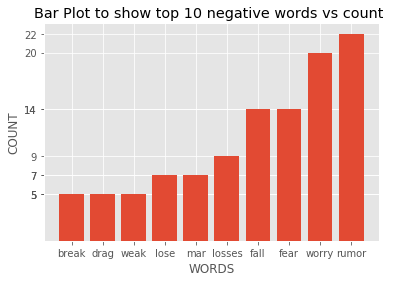

In [75]:
# Plotting the Bar Plot to show top 10 negative words vs count 
y=my_list_names[-10:]
plt.bar(y, height=my_list_values[-10:])
plt.xticks(my_list_names[-10:],my_list_names[-10:])
plt.yticks(my_list_values[-10:])
plt.xlabel("WORDS")
plt.ylabel("COUNT")
plt.title("Bar Plot to show top 10 negative words vs count ")
plt.show()

In [76]:
comb_word_news={}

In [77]:
for x in final_dataset_News.AAPL_nonstop:
    for key in x:
        if key in pos_lines:
            if key in comb_word_news:
                comb_word_news[key] += x[key]
            else:
                comb_word_news[key] = x[key]

In [78]:
my_list_names = []
my_list_values = []
count = 0
for key, value in sorted(comb_word_news.items(), key=lambda item: item[1]):
    my_list_names.append(key)
    my_list_values.append(value)
    count += 1

print(my_list_names[-10:], my_list_values[-10:])


['overtake', 'strong', 'lead', 'best', 'optimism', 'right', 'win', 'gain', 'top', 'boost'] [3, 4, 5, 6, 6, 7, 7, 11, 16, 23]


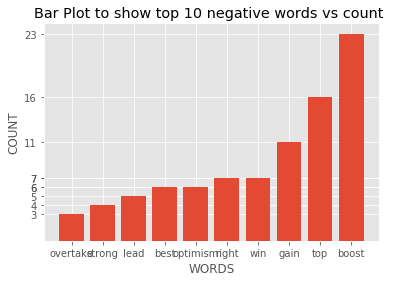

In [79]:
# Plotting the Bar Plot to show top 10 positive words vs count 
y=my_list_names[-10:]
plt.bar(y, height=my_list_values[-10:])
plt.xticks(my_list_names[-10:],my_list_names[-10:])
plt.yticks(my_list_values[-10:])
plt.xlabel("WORDS")
plt.ylabel("COUNT")
plt.title("Bar Plot to show top 10 negative words vs count ")
plt.show()

In [80]:
#### USING POSITIVE LIST AND NEGATIVE LIST

In [81]:
final_dataset_News['pos_parity_news']=final_dataset_News['AAPL_nonstop'].apply(lambda x: pos_parity(x))

In [82]:
final_dataset_News['neg_parity_news']=final_dataset_News['AAPL_nonstop'].apply(lambda x: neg_parity(x))

In [83]:
final_dataset_News

Month Day                                       AAPL_nonstop  \
0      3  16  {'battle': 1, 'dividends': 1, 'apple': 3, 'vs'...   
1      3  17  {'forget': 1, 'fitbit': 1, 'huami': 1, 'better...   
2      3  18  {'big': 2, 'ipad': 8, 'update': 5, 'reveal': 1...   
3      3  19  {'better': 1, 'buy': 2, 'apple': 12, 'vs': 1, ...   
4      3  20  {'apples': 2, 'new': 4, 'airpods': 5, 'big': 1...   
5      3  21  {'sony': 1, 'pull': 1, 'plug': 1, 'smartphone'...   
6      3  22  {'tech': 1, 'stock': 10, 'week': 1, 'apple': 1...   
7      3  23  {'apples': 2, 'video': 1, 'stream': 1, 'servic...   
8      3  24  {'focusapples': 1, 'iphone': 1, 'struggle': 1,...   
9      3  25  {'apples': 3, 'new': 6, 'service': 6, 'anticip...   
10     3  26  {'problem': 1, 'apples': 5, 'service': 4, 'str...   
11     3  27  {'stock': 8, 'settle': 1, 'choppy': 1, 'sessio...   
12     3  28  {'apples': 2, 'new': 1, 'stream': 1, 'tv': 1, ...   
13     3  29  {'friday': 1, 'apple': 5, 'rumor': 1, 'schemat...   
14     3  30  {'apple': 3, 'stock': 3, 'get': 1, 'boost': 1,...   
15     3  31  {'chinas': 1, 'factory': 1, 'activity': 1, 'pi...   
16     4   1  {'apple': 18, 'luxury': 1, 'brand': 1, 'drop':...   
17     4  10  {'disney': 1, 'disneys': 1, 'pivot': 1, 'tech'...   
18     4  11  {'inside': 1, 'softbanks': 1, 'push': 2, 'rule...   
19     4  12  {'amazon': 2, 'wade': 1, 'data': 1, 'privacy':...   
20     4  13  {'inside': 1, 'softbanks': 1, 'push': 1, 'rule...   
21     4  14  {'apple': 1, 'suppliers': 1, 'rescue': 1, 'lea...   
22     4  15  {'apple': 8, 'service': 2, 'strategy': 1, 'hit...   
23     4  16  {'tomtom': 1, 'result': 1, 'top': 2, 'estimate...   
24     4   2  {'cirrus': 1, 'logic': 1, 'apples': 3, 'latest...   
25     4   3  {'pay': 1, 'music': 1, 'stream': 1, 'hit': 1, ...   
26     4   4  {'apple': 8, 'slash': 1, 'homepod': 2, 'price'...   
27     4   5  {'apple': 5, 'leave': 1, 'cirrus': 1, 'logic':...   
28     4   6  {'facebook': 1, 'want': 1, 'change': 1, 'consu...   
29     4   7  {'apple': 4, 'make': 1, 'yet': 1, 'another': 1...   
30     4   8  {'intels': 1, 'chip': 1, 'issue': 1, 'hurt': 1...   
31     4   9  {'dan': 1, 'loeb': 1, 'help': 1, 'sony': 2, 'h...   

    pos_parity_news  neg_parity_news  
0          0.034483         0.068966  
1          0.166667         0.000000  
2          0.018382         0.036765  
3          0.038462         0.048077  
4          0.014815         0.059259  
5          0.052486         0.033149  
6          0.027907         0.074419  
7          0.000000         0.000000  
8          0.032258         0.129032  
9          0.018717         0.085561  
10         0.037534         0.050938  
11         0.019900         0.064677  
12         0.023256         0.062016  
13         0.008850         0.053097  
14         0.021739         0.000000  
15         0.023256         0.093023  
16         0.066148         0.050584  
17         0.019900         0.049751  
18         0.051546         0.030928  
19         0.037500         0.037500  
20         0.000000         0.000000  
21         0.000000         0.000000  
22         0.027397         0.020548  
23         0.050139         0.027855  
24         0.052632         0.017544  
25         0.018634         0.018634  
26         0.008772         0.052632  
27         0.071066         0.035533  
28         0.062500         0.000000  
29         0.102564         0.025641  
30         0.058824         0.058824  
31         0.033493         0.038278

In [84]:
new_df_News= final_dataset_News.drop(["AAPL_nonstop","Month","Day"], axis=1)
final_dataset_News['Day'] = final_dataset_News['Day'].astype(int)
final_dataset_News['Month'] = final_dataset_News['Month'].astype(int)
new_df_News

pos_parity_news  neg_parity_news
0          0.034483         0.068966
1          0.166667         0.000000
2          0.018382         0.036765
3          0.038462         0.048077
4          0.014815         0.059259
5          0.052486         0.033149
6          0.027907         0.074419
7          0.000000         0.000000
8          0.032258         0.129032
9          0.018717         0.085561
10         0.037534         0.050938
11         0.019900         0.064677
12         0.023256         0.062016
13         0.008850         0.053097
14         0.021739         0.000000
15         0.023256         0.093023
16         0.066148         0.050584
17         0.019900         0.049751
18         0.051546         0.030928
19         0.037500         0.037500
20         0.000000         0.000000
21         0.000000         0.000000
22         0.027397         0.020548
23         0.050139         0.027855
24         0.052632         0.017544
25         0.018634         0.018634
26         0.008772         0.052632
27         0.071066         0.035533
28         0.062500         0.000000
29         0.102564         0.025641
30         0.058824         0.058824
31         0.033493         0.038278

### GETTING STOCKS DATA

In [85]:
df2 = pd.read_csv('Apple_Stock.csv',encoding='utf=8') #header=None, names=['Date_time', 'Tweets'])
#df['Date'] = df['Date_time']

In [86]:
df2

Date        High         Low        Open       Close    Volume  \
0   3/15/2019  187.330002  183.740005  184.850006  186.119995  39042900   
1   3/16/2019  187.330002  183.740005  184.850006  186.119995  39042900   
2   3/17/2019  187.330002  183.740005  184.850006  186.119995  39042900   
3   3/18/2019  188.389999  185.789993  185.800003  188.020004  26219800   
4   3/19/2019  188.990005  185.919998  188.350006  186.529999  31646400   
5   3/20/2019  189.490005  184.729996  186.229996  188.160004  31035200   
6   3/21/2019  196.330002  189.809998  190.020004  195.089996  51034200   
7   3/22/2019  197.690002  190.779999  195.339996  191.050003  42407700   
8   3/23/2019  197.690002  190.779999  195.339996  191.050003  42407700   
9   3/24/2019  197.690002  190.779999  195.339996  191.050003  42407700   
10  3/25/2019  191.979996  186.600006  191.509995  188.740005  43845300   
11  3/26/2019  192.880005  184.580002  191.660004  186.789993  49800500   
12  3/27/2019  189.759995  186.550003  188.750000  188.470001  29848400   
13  3/28/2019  189.559998  187.529999  188.949997  188.720001  20780400   
14  3/29/2019  190.080002  188.539993  189.830002  189.949997  23564000   
15  3/30/2019  190.080002  188.539993  189.830002  189.949997  23564000   
16  3/31/2019  190.080002  188.539993  189.830002  189.949997  23564000   
17   4/1/2019  191.679993  188.380005  191.639999  191.240005  27862000   
18   4/2/2019  194.460007  191.050003  191.089996  194.020004  22765700   
19   4/3/2019  196.500000  193.149994  193.250000  195.350006  23271800   
20   4/4/2019  196.369995  193.139999  194.789993  195.690002  19114300   
21   4/5/2019  197.100006  195.929993  196.449997  197.000000  18526600   
22   4/6/2019  197.100006  195.929993  196.449997  197.000000  18526600   
23   4/7/2019  197.100006  195.929993  196.449997  197.000000  18526600   
24   4/8/2019  200.229996  196.339996  196.419998  200.100006  25881700   
25   4/9/2019  202.850006  199.229996  200.320007  199.500000  35768200   
26  4/10/2019  200.740005  198.179993  198.679993  200.619995  21695300   
27  4/11/2019  201.000000  198.440002  200.850006  198.949997  20900800   
28  4/12/2019  200.139999  196.210007  199.199997  198.869995  27760700   
29  4/13/2019  200.139999  196.210007  199.199997  198.869995  27760700   
30  4/14/2019  200.139999  196.210007  199.199997  198.869995  27760700   
31  4/15/2019  199.850006  198.009995  198.580002  199.229996  17536600   
32  4/16/2019  201.369995  198.559998  199.460007  199.250000  25696400   

     Adj Close  
0   186.119995  
1   186.119995  
2   186.119995  
3   188.020004  
4   186.529999  
5   188.160004  
6   195.089996  
7   191.050003  
8   191.050003  
9   191.050003  
10  188.740005  
11  186.789993  
12  188.470001  
13  188.720001  
14  189.949997  
15  189.949997  
16  189.949997  
17  191.240005  
18  194.020004  
19  195.350006  
20  195.690002  
21  197.000000  
22  197.000000  
23  197.000000  
24  200.100006  
25  199.500000  
26  200.619995  
27  198.949997  
28  198.869995  
29  198.869995  
30  198.869995  
31  199.229996  
32  199.250000

In [87]:
Vol=df2[['Volume']]

In [88]:
#Calculating normalized value for Volume of Stocks using preprocessing.
min_max_scaler=preprocessing.MinMaxScaler()
vol_scaled=min_max_scaler.fit_transform(Vol)

In [89]:
Vol_normalized=pd.DataFrame(vol_scaled,columns=["Volume_norm"])
df2["Vol_normalized"]=Vol_normalized
df2

Date        High         Low        Open       Close    Volume  \
0   3/15/2019  187.330002  183.740005  184.850006  186.119995  39042900   
1   3/16/2019  187.330002  183.740005  184.850006  186.119995  39042900   
2   3/17/2019  187.330002  183.740005  184.850006  186.119995  39042900   
3   3/18/2019  188.389999  185.789993  185.800003  188.020004  26219800   
4   3/19/2019  188.990005  185.919998  188.350006  186.529999  31646400   
5   3/20/2019  189.490005  184.729996  186.229996  188.160004  31035200   
6   3/21/2019  196.330002  189.809998  190.020004  195.089996  51034200   
7   3/22/2019  197.690002  190.779999  195.339996  191.050003  42407700   
8   3/23/2019  197.690002  190.779999  195.339996  191.050003  42407700   
9   3/24/2019  197.690002  190.779999  195.339996  191.050003  42407700   
10  3/25/2019  191.979996  186.600006  191.509995  188.740005  43845300   
11  3/26/2019  192.880005  184.580002  191.660004  186.789993  49800500   
12  3/27/2019  189.759995  186.550003  188.750000  188.470001  29848400   
13  3/28/2019  189.559998  187.529999  188.949997  188.720001  20780400   
14  3/29/2019  190.080002  188.539993  189.830002  189.949997  23564000   
15  3/30/2019  190.080002  188.539993  189.830002  189.949997  23564000   
16  3/31/2019  190.080002  188.539993  189.830002  189.949997  23564000   
17   4/1/2019  191.679993  188.380005  191.639999  191.240005  27862000   
18   4/2/2019  194.460007  191.050003  191.089996  194.020004  22765700   
19   4/3/2019  196.500000  193.149994  193.250000  195.350006  23271800   
20   4/4/2019  196.369995  193.139999  194.789993  195.690002  19114300   
21   4/5/2019  197.100006  195.929993  196.449997  197.000000  18526600   
22   4/6/2019  197.100006  195.929993  196.449997  197.000000  18526600   
23   4/7/2019  197.100006  195.929993  196.449997  197.000000  18526600   
24   4/8/2019  200.229996  196.339996  196.419998  200.100006  25881700   
25   4/9/2019  202.850006  199.229996  200.320007  199.500000  35768200   
26  4/10/2019  200.740005  198.179993  198.679993  200.619995  21695300   
27  4/11/2019  201.000000  198.440002  200.850006  198.949997  20900800   
28  4/12/2019  200.139999  196.210007  199.199997  198.869995  27760700   
29  4/13/2019  200.139999  196.210007  199.199997  198.869995  27760700   
30  4/14/2019  200.139999  196.210007  199.199997  198.869995  27760700   
31  4/15/2019  199.850006  198.009995  198.580002  199.229996  17536600   
32  4/16/2019  201.369995  198.559998  199.460007  199.250000  25696400   

     Adj Close  Vol_normalized  
0   186.119995        0.642025  
1   186.119995        0.642025  
2   186.119995        0.642025  
3   188.020004        0.259219  
4   186.529999        0.421218  
5   188.160004        0.402972  
6   195.089996        1.000000  
7   191.050003        0.742474  
8   191.050003        0.742474  
9   191.050003        0.742474  
10  188.740005        0.785391  
11  186.789993        0.963170  
12  188.470001        0.367543  
13  188.720001        0.096837  
14  189.949997        0.179935  
15  189.949997        0.179935  
16  189.949997        0.179935  
17  191.240005        0.308243  
18  194.020004        0.156104  
19  195.350006        0.171212  
20  195.690002        0.047099  
21  197.000000        0.029554  
22  197.000000        0.029554  
23  197.000000        0.029554  
24  200.100006        0.249125  
25  199.500000        0.544266  
26  200.619995        0.124149  
27  198.949997        0.100431  
28  198.869995        0.305219  
29  198.869995        0.305219  
30  198.869995        0.305219  
31  199.229996        0.000000  
32  199.250000        0.243594

In [90]:
df2['daily_return']= (df2['Close']-df2['Open'])/df2['Open']
df2

Date        High         Low        Open       Close    Volume  \
0   3/15/2019  187.330002  183.740005  184.850006  186.119995  39042900   
1   3/16/2019  187.330002  183.740005  184.850006  186.119995  39042900   
2   3/17/2019  187.330002  183.740005  184.850006  186.119995  39042900   
3   3/18/2019  188.389999  185.789993  185.800003  188.020004  26219800   
4   3/19/2019  188.990005  185.919998  188.350006  186.529999  31646400   
5   3/20/2019  189.490005  184.729996  186.229996  188.160004  31035200   
6   3/21/2019  196.330002  189.809998  190.020004  195.089996  51034200   
7   3/22/2019  197.690002  190.779999  195.339996  191.050003  42407700   
8   3/23/2019  197.690002  190.779999  195.339996  191.050003  42407700   
9   3/24/2019  197.690002  190.779999  195.339996  191.050003  42407700   
10  3/25/2019  191.979996  186.600006  191.509995  188.740005  43845300   
11  3/26/2019  192.880005  184.580002  191.660004  186.789993  49800500   
12  3/27/2019  189.759995  186.550003  188.750000  188.470001  29848400   
13  3/28/2019  189.559998  187.529999  188.949997  188.720001  20780400   
14  3/29/2019  190.080002  188.539993  189.830002  189.949997  23564000   
15  3/30/2019  190.080002  188.539993  189.830002  189.949997  23564000   
16  3/31/2019  190.080002  188.539993  189.830002  189.949997  23564000   
17   4/1/2019  191.679993  188.380005  191.639999  191.240005  27862000   
18   4/2/2019  194.460007  191.050003  191.089996  194.020004  22765700   
19   4/3/2019  196.500000  193.149994  193.250000  195.350006  23271800   
20   4/4/2019  196.369995  193.139999  194.789993  195.690002  19114300   
21   4/5/2019  197.100006  195.929993  196.449997  197.000000  18526600   
22   4/6/2019  197.100006  195.929993  196.449997  197.000000  18526600   
23   4/7/2019  197.100006  195.929993  196.449997  197.000000  18526600   
24   4/8/2019  200.229996  196.339996  196.419998  200.100006  25881700   
25   4/9/2019  202.850006  199.229996  200.320007  199.500000  35768200   
26  4/10/2019  200.740005  198.179993  198.679993  200.619995  21695300   
27  4/11/2019  201.000000  198.440002  200.850006  198.949997  20900800   
28  4/12/2019  200.139999  196.210007  199.199997  198.869995  27760700   
29  4/13/2019  200.139999  196.210007  199.199997  198.869995  27760700   
30  4/14/2019  200.139999  196.210007  199.199997  198.869995  27760700   
31  4/15/2019  199.850006  198.009995  198.580002  199.229996  17536600   
32  4/16/2019  201.369995  198.559998  199.460007  199.250000  25696400   

     Adj Close  Vol_normalized  daily_return  
0   186.119995        0.642025      0.006870  
1   186.119995        0.642025      0.006870  
2   186.119995        0.642025      0.006870  
3   188.020004        0.259219      0.011948  
4   186.529999        0.421218     -0.009663  
5   188.160004        0.402972      0.010364  
6   195.089996        1.000000      0.026681  
7   191.050003        0.742474     -0.021962  
8   191.050003        0.742474     -0.021962  
9   191.050003        0.742474     -0.021962  
10  188.740005        0.785391     -0.014464  
11  186.789993        0.963170     -0.025410  
12  188.470001        0.367543     -0.001483  
13  188.720001        0.096837     -0.001217  
14  189.949997        0.179935      0.000632  
15  189.949997        0.179935      0.000632  
16  189.949997        0.179935      0.000632  
17  191.240005        0.308243     -0.002087  
18  194.020004        0.156104      0.015333  
19  195.350006        0.171212      0.010867  
20  195.690002        0.047099      0.004620  
21  197.000000        0.029554      0.002800  
22  197.000000        0.029554      0.002800  
23  197.000000        0.029554      0.002800  
24  200.100006        0.249125      0.018735  
25  199.500000        0.544266     -0.004093  
26  200.619995        0.124149      0.009764  
27  198.949997        0.100431     -0.009460  
28  198.869995        0.305219     -0.001657  
29  198.869995        0.305219     -0.001657  
3

In [91]:
Apple_Data_Stock=df2
print(type(Apple_Data_Stock.Date))
print(type(df2.Date))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [92]:
Apple_Data_Stock['Month']=[d.split('/')[0] for d in Apple_Data_Stock.Date]
Apple_Data_Stock['Day']=[d.split('/')[1] for d in Apple_Data_Stock.Date]
Apple_Data_Stock['Year']=[d.split('/')[2] for d in Apple_Data_Stock.Date]

33
33


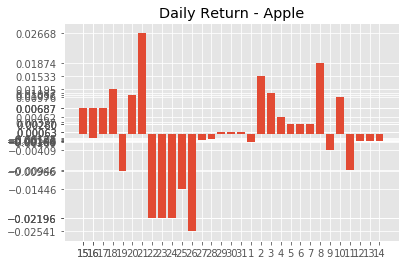

<Figure size 2880x1080 with 0 Axes>

In [93]:
#Plotting Daily Return

daily_return_list=[]
for x in Apple_Data_Stock.daily_return:
    daily_return_list.append(x)
print(len(daily_return_list))
day_list=[]
for x in Apple_Data_Stock.Day:
    day_list.append(x)
print(len(day_list))
#plt.hist(daily_return_list)
y=day_list
plt.bar(y, height=daily_return_list)

plt.title("Daily Return - Apple")
plt.xticks(day_list,day_list)
plt.yticks(daily_return_list)
plt.figure(figsize=(40,15))
plt.show()

In [94]:
Apple_Data_Stock

Date        High         Low        Open       Close    Volume  \
0   3/15/2019  187.330002  183.740005  184.850006  186.119995  39042900   
1   3/16/2019  187.330002  183.740005  184.850006  186.119995  39042900   
2   3/17/2019  187.330002  183.740005  184.850006  186.119995  39042900   
3   3/18/2019  188.389999  185.789993  185.800003  188.020004  26219800   
4   3/19/2019  188.990005  185.919998  188.350006  186.529999  31646400   
5   3/20/2019  189.490005  184.729996  186.229996  188.160004  31035200   
6   3/21/2019  196.330002  189.809998  190.020004  195.089996  51034200   
7   3/22/2019  197.690002  190.779999  195.339996  191.050003  42407700   
8   3/23/2019  197.690002  190.779999  195.339996  191.050003  42407700   
9   3/24/2019  197.690002  190.779999  195.339996  191.050003  42407700   
10  3/25/2019  191.979996  186.600006  191.509995  188.740005  43845300   
11  3/26/2019  192.880005  184.580002  191.660004  186.789993  49800500   
12  3/27/2019  189.759995  186.550003  188.750000  188.470001  29848400   
13  3/28/2019  189.559998  187.529999  188.949997  188.720001  20780400   
14  3/29/2019  190.080002  188.539993  189.830002  189.949997  23564000   
15  3/30/2019  190.080002  188.539993  189.830002  189.949997  23564000   
16  3/31/2019  190.080002  188.539993  189.830002  189.949997  23564000   
17   4/1/2019  191.679993  188.380005  191.639999  191.240005  27862000   
18   4/2/2019  194.460007  191.050003  191.089996  194.020004  22765700   
19   4/3/2019  196.500000  193.149994  193.250000  195.350006  23271800   
20   4/4/2019  196.369995  193.139999  194.789993  195.690002  19114300   
21   4/5/2019  197.100006  195.929993  196.449997  197.000000  18526600   
22   4/6/2019  197.100006  195.929993  196.449997  197.000000  18526600   
23   4/7/2019  197.100006  195.929993  196.449997  197.000000  18526600   
24   4/8/2019  200.229996  196.339996  196.419998  200.100006  25881700   
25   4/9/2019  202.850006  199.229996  200.320007  199.500000  35768200   
26  4/10/2019  200.740005  198.179993  198.679993  200.619995  21695300   
27  4/11/2019  201.000000  198.440002  200.850006  198.949997  20900800   
28  4/12/2019  200.139999  196.210007  199.199997  198.869995  27760700   
29  4/13/2019  200.139999  196.210007  199.199997  198.869995  27760700   
30  4/14/2019  200.139999  196.210007  199.199997  198.869995  27760700   
31  4/15/2019  199.850006  198.009995  198.580002  199.229996  17536600   
32  4/16/2019  201.369995  198.559998  199.460007  199.250000  25696400   

     Adj Close  Vol_normalized  daily_return Month Day  Year  
0   186.119995        0.642025      0.006870     3  15  2019  
1   186.119995        0.642025      0.006870     3  16  2019  
2   186.119995        0.642025      0.006870     3  17  2019  
3   188.020004        0.259219      0.011948     3  18  2019  
4   186.529999        0.421218     -0.009663     3  19  2019  
5   188.160004        0.402972      0.010364     3  20  2019  
6   195.089996        1.000000      0.026681     3  21  2019  
7   191.050003        0.742474     -0.021962     3  22  2019  
8   191.050003        0.742474     -0.021962     3  23  2019  
9   191.050003        0.742474     -0.021962     3  24  2019  
10  188.740005        0.785391     -0.014464     3  25  2019  
11  186.789993        0.963170     -0.025410     3  26  2019  
12  188.470001        0.367543     -0.001483     3  27  2019  
13  188.720001        0.096837     -0.001217     3  28  2019  
14  189.949997        0.179935      0.000632     3  29  2019  
15  189.949997        0.179935      0.000632     3  30  2019  
16  189.949997        0.179935      0.000632     3  31  2019  
17  191.240005        0.308243     -0.002087     4   1  2019  
18  194.020004        0.156104      0.015333     4   2  2019  
19  195.350006        0.171212      0.010867     4   3  2019  
20  195.690002        0.047099      0.004620     4   4  2019  
21  197.000000        0.029554      0.002800     4   5  2019  
22  197.0

In [95]:
Apple_Data_Stock = Apple_Data_Stock.drop(['Year'],axis=1)
Apple_Data_Stock

Date        High         Low        Open       Close    Volume  \
0   3/15/2019  187.330002  183.740005  184.850006  186.119995  39042900   
1   3/16/2019  187.330002  183.740005  184.850006  186.119995  39042900   
2   3/17/2019  187.330002  183.740005  184.850006  186.119995  39042900   
3   3/18/2019  188.389999  185.789993  185.800003  188.020004  26219800   
4   3/19/2019  188.990005  185.919998  188.350006  186.529999  31646400   
5   3/20/2019  189.490005  184.729996  186.229996  188.160004  31035200   
6   3/21/2019  196.330002  189.809998  190.020004  195.089996  51034200   
7   3/22/2019  197.690002  190.779999  195.339996  191.050003  42407700   
8   3/23/2019  197.690002  190.779999  195.339996  191.050003  42407700   
9   3/24/2019  197.690002  190.779999  195.339996  191.050003  42407700   
10  3/25/2019  191.979996  186.600006  191.509995  188.740005  43845300   
11  3/26/2019  192.880005  184.580002  191.660004  186.789993  49800500   
12  3/27/2019  189.759995  186.550003  188.750000  188.470001  29848400   
13  3/28/2019  189.559998  187.529999  188.949997  188.720001  20780400   
14  3/29/2019  190.080002  188.539993  189.830002  189.949997  23564000   
15  3/30/2019  190.080002  188.539993  189.830002  189.949997  23564000   
16  3/31/2019  190.080002  188.539993  189.830002  189.949997  23564000   
17   4/1/2019  191.679993  188.380005  191.639999  191.240005  27862000   
18   4/2/2019  194.460007  191.050003  191.089996  194.020004  22765700   
19   4/3/2019  196.500000  193.149994  193.250000  195.350006  23271800   
20   4/4/2019  196.369995  193.139999  194.789993  195.690002  19114300   
21   4/5/2019  197.100006  195.929993  196.449997  197.000000  18526600   
22   4/6/2019  197.100006  195.929993  196.449997  197.000000  18526600   
23   4/7/2019  197.100006  195.929993  196.449997  197.000000  18526600   
24   4/8/2019  200.229996  196.339996  196.419998  200.100006  25881700   
25   4/9/2019  202.850006  199.229996  200.320007  199.500000  35768200   
26  4/10/2019  200.740005  198.179993  198.679993  200.619995  21695300   
27  4/11/2019  201.000000  198.440002  200.850006  198.949997  20900800   
28  4/12/2019  200.139999  196.210007  199.199997  198.869995  27760700   
29  4/13/2019  200.139999  196.210007  199.199997  198.869995  27760700   
30  4/14/2019  200.139999  196.210007  199.199997  198.869995  27760700   
31  4/15/2019  199.850006  198.009995  198.580002  199.229996  17536600   
32  4/16/2019  201.369995  198.559998  199.460007  199.250000  25696400   

     Adj Close  Vol_normalized  daily_return Month Day  
0   186.119995        0.642025      0.006870     3  15  
1   186.119995        0.642025      0.006870     3  16  
2   186.119995        0.642025      0.006870     3  17  
3   188.020004        0.259219      0.011948     3  18  
4   186.529999        0.421218     -0.009663     3  19  
5   188.160004        0.402972      0.010364     3  20  
6   195.089996        1.000000      0.026681     3  21  
7   191.050003        0.742474     -0.021962     3  22  
8   191.050003        0.742474     -0.021962     3  23  
9   191.050003        0.742474     -0.021962     3  24  
10  188.740005        0.785391     -0.014464     3  25  
11  186.789993        0.963170     -0.025410     3  26  
12  188.470001        0.367543     -0.001483     3  27  
13  188.720001        0.096837     -0.001217     3  28  
14  189.949997        0.179935      0.000632     3  29  
15  189.949997        0.179935      0.000632     3  30  
16  189.949997        0.179935      0.000632     3  31  
17  191.240005        0.308243     -0.002087     4   1  
18  194.020004        0.156104      0.015333     4   2  
19  195.350006        0.171212      0.010867     4   3  
20  195.690002        0.047099      0.004620     4   4  
21  197.000000        0.029554      0.002800     4   5  
22  197.000000        0.029554      0.002800     4   6  
23  197.000000        0.029554      0.002800     4   7  
24  200.100006        0.249125   

In [96]:
Apple_Data_Stock['Day'] = Apple_Data_Stock['Day'].astype(int)
Apple_Data_Stock['Month'] = Apple_Data_Stock['Month'].astype(int)

In [97]:
Apple_Data_Stock["1d"] = np.round(Apple_Data_Stock["Close"].rolling(window=1,center=False).mean(),2) 

In [98]:
Apple_Data_Stock

Date        High         Low        Open       Close    Volume  \
0   3/15/2019  187.330002  183.740005  184.850006  186.119995  39042900   
1   3/16/2019  187.330002  183.740005  184.850006  186.119995  39042900   
2   3/17/2019  187.330002  183.740005  184.850006  186.119995  39042900   
3   3/18/2019  188.389999  185.789993  185.800003  188.020004  26219800   
4   3/19/2019  188.990005  185.919998  188.350006  186.529999  31646400   
5   3/20/2019  189.490005  184.729996  186.229996  188.160004  31035200   
6   3/21/2019  196.330002  189.809998  190.020004  195.089996  51034200   
7   3/22/2019  197.690002  190.779999  195.339996  191.050003  42407700   
8   3/23/2019  197.690002  190.779999  195.339996  191.050003  42407700   
9   3/24/2019  197.690002  190.779999  195.339996  191.050003  42407700   
10  3/25/2019  191.979996  186.600006  191.509995  188.740005  43845300   
11  3/26/2019  192.880005  184.580002  191.660004  186.789993  49800500   
12  3/27/2019  189.759995  186.550003  188.750000  188.470001  29848400   
13  3/28/2019  189.559998  187.529999  188.949997  188.720001  20780400   
14  3/29/2019  190.080002  188.539993  189.830002  189.949997  23564000   
15  3/30/2019  190.080002  188.539993  189.830002  189.949997  23564000   
16  3/31/2019  190.080002  188.539993  189.830002  189.949997  23564000   
17   4/1/2019  191.679993  188.380005  191.639999  191.240005  27862000   
18   4/2/2019  194.460007  191.050003  191.089996  194.020004  22765700   
19   4/3/2019  196.500000  193.149994  193.250000  195.350006  23271800   
20   4/4/2019  196.369995  193.139999  194.789993  195.690002  19114300   
21   4/5/2019  197.100006  195.929993  196.449997  197.000000  18526600   
22   4/6/2019  197.100006  195.929993  196.449997  197.000000  18526600   
23   4/7/2019  197.100006  195.929993  196.449997  197.000000  18526600   
24   4/8/2019  200.229996  196.339996  196.419998  200.100006  25881700   
25   4/9/2019  202.850006  199.229996  200.320007  199.500000  35768200   
26  4/10/2019  200.740005  198.179993  198.679993  200.619995  21695300   
27  4/11/2019  201.000000  198.440002  200.850006  198.949997  20900800   
28  4/12/2019  200.139999  196.210007  199.199997  198.869995  27760700   
29  4/13/2019  200.139999  196.210007  199.199997  198.869995  27760700   
30  4/14/2019  200.139999  196.210007  199.199997  198.869995  27760700   
31  4/15/2019  199.850006  198.009995  198.580002  199.229996  17536600   
32  4/16/2019  201.369995  198.559998  199.460007  199.250000  25696400   

     Adj Close  Vol_normalized  daily_return  Month  Day      1d  
0   186.119995        0.642025      0.006870      3   15  186.12  
1   186.119995        0.642025      0.006870      3   16  186.12  
2   186.119995        0.642025      0.006870      3   17  186.12  
3   188.020004        0.259219      0.011948      3   18  188.02  
4   186.529999        0.421218     -0.009663      3   19  186.53  
5   188.160004        0.402972      0.010364      3   20  188.16  
6   195.089996        1.000000      0.026681      3   21  195.09  
7   191.050003        0.742474     -0.021962      3   22  191.05  
8   191.050003        0.742474     -0.021962      3   23  191.05  
9   191.050003        0.742474     -0.021962      3   24  191.05  
10  188.740005        0.785391     -0.014464      3   25  188.74  
11  186.789993        0.963170     -0.025410      3   26  186.79  
12  188.470001        0.367543     -0.001483      3   27  188.47  
13  188.720001        0.096837     -0.001217      3   28  188.72  
14  189.949997        0.179935      0.000632      3   29  189.95  
15  189.949997        0.179935      0.000632      3   30  189.95  
16  189.949997        0.179935      0.000632      3   31  189.95  
17  191.240005        0.308243     -0.002087      4    1  191.24  
18  194.020004        0.156104      0.015333      4    2  194.02  
19  195.350006        0.171212      0.010867      4    3  195.35  
20  195.690002        0.047099      0.004620      4

### FEATURE ENGINEERING

In [99]:
#Merging Data to create a Combined Dataframe to apply ML Model.
df3=pd.merge(final_dataset_Tweets,final_dataset_News, how="outer", on=["Month","Day"])

In [100]:
df3

Month  Day                                      Tweet_nonstop  \
0       3   14  {'aapl': 740, 'patent': 52, 'automate': 1, 'ca...   
1       3   16  {'melaynalokosky': 1, 'wintoncapptnrs': 1, 'me...   
2       3   17  {'join': 309, 'robinhoodapp': 303, 'well': 318...   
3       3   18  {'watch': 68, 'happen': 6, 'naviavatar': 4, 'b...   
4       3   19  {'de': 6, 'dis': 48, 'mcd': 2, 'nice': 18, 'aa...   
5       3   20  {'join': 346, 'robinhoodapp': 324, 'well': 342...   
6       3   21  {'jeffvandenburgh': 2, 'still': 68, 'place': 1...   
7       3   22  {'bravotrader': 2, 'algorithms': 2, 'scar': 4,...   
8       3   23  {'powerserious': 4, 'clown': 2, 'must': 4, 'du...   
9       3   24  {'join': 122, 'robinhoodapp': 120, 'well': 126...   
10      3   25  {'join': 54, 'robinhoodapp': 48, 'well': 66, '...   
11      3   26  {'qcom': 74, 'aapl': 1734, 'applequalcomm': 1,...   
12      3   27  {'apple': 354, 'aapl': 1080, 'long': 24, 'shor...   
13      3   28  {'join': 72, 'robinhoodapp': 66, 'well': 77, '...   
14      3   30  {'join': 36, 'robinhoodapp': 37, 'well': 38, '...   
15      3   31  {'weekly': 8, 'stock': 127, 'market': 47, 'rev...   
16      4    1  {'get': 134, 'ready': 6, 'olympics': 3, 'tokyo...   
17      4    2  {'like': 156, 'say': 16, 'would': 6, 'test': 6...   
18      4    3  {'join': 192, 'robinhoodapp': 182, 'well': 196...   
19      4    4  {'aapl': 913, 'close': 10, 'doesnt': 3, 'need'...   
20      4    5  {'watch': 14, 'happen': 6, 'naviavatar': 2, 'b...   
21      4    6  {'join': 111, 'robinhoodapp': 107, 'well': 109...   
22      4    7  {'trade': 68, 'ideasalertsinsightlive': 1, 'pm...   
23      4    8  {'rampcapitalllc': 2, 'marketwatch': 2, 'like'...   
24      4    9  {'sandropower': 4, 'appl': 14, 'another': 2, '...   
25      4   10  {'boom': 1, 'appl': 10, 'dapple': 1, 'cnbcfast...   
26      4   11  {'join': 188, 'robinhoodapp': 181, 'well': 182...   
27      4   12  {'stay': 8, 'ahead': 4, 'nasdaq': 10, 'news': ...   
28      4   13  {'join': 117, 'robinhoodapp': 112, 'well': 117...   
29      4   14  {'join': 103, 'robinhoodapp': 96, 'well': 98, ...   
30      4   15  {'hey': 2, 'big': 16, 'board': 3, 'might': 11,...   
31      4   16  {'aapl': 1183, 'patent': 68, 'maintenance': 2,...   
32      3   29                                                NaN   

    pos_parity_tweets  neg_parity_tweets  \
0            0.062987           0.021614   
1            0.071613           0.020769   
2            0.078668           0.021075   
3            0.064713           0.019743   
4            0.076768           0.019804   
5            0.073075           0.016703   
6            0.064421           0.021638   
7            0.058980           0.026105   
8            0.078267           0.016360   
9            0.056389           0.021434   
10           0.047246           0.030959   
11           0.053721           0.031813   
12           0.051641           0.030247   
13           0.047278           0.029436   
14           0.080386           0.017864   
15           0.055030           0.021893   
16           0.058047           0.024530   
17           0.066109           0.019872   
18           0.071847           0.019388   
19           0.078279           0.020628   
20           0.075029           0.018433   
21           0.090644           0.015289   
22           0.083671           0.019729   
23           0.072965           0.024522   
24           0.064039           0.049261   
25           0.037037           0.049383   
26           0.069543           0.020637   
27           0.069129           0.022212   
28           0.085128           0.014021   
29           0.072834           0.019021   
30           0.060861           0.022959   
31           0.058133           0.020939   
32                NaN                NaN   

                                         AAPL_nonstop  pos_parity_news  \
0                                                 NaN              NaN   
1   {'battle

In [101]:
df4= pd.merge(df3,Apple_Data_Stock, how="outer", on=["Month","Day"])

In [102]:
df4

Month  Day                                      Tweet_nonstop  \
0       3   14  {'aapl': 740, 'patent': 52, 'automate': 1, 'ca...   
1       3   16  {'melaynalokosky': 1, 'wintoncapptnrs': 1, 'me...   
2       3   17  {'join': 309, 'robinhoodapp': 303, 'well': 318...   
3       3   18  {'watch': 68, 'happen': 6, 'naviavatar': 4, 'b...   
4       3   19  {'de': 6, 'dis': 48, 'mcd': 2, 'nice': 18, 'aa...   
5       3   20  {'join': 346, 'robinhoodapp': 324, 'well': 342...   
6       3   21  {'jeffvandenburgh': 2, 'still': 68, 'place': 1...   
7       3   22  {'bravotrader': 2, 'algorithms': 2, 'scar': 4,...   
8       3   23  {'powerserious': 4, 'clown': 2, 'must': 4, 'du...   
9       3   24  {'join': 122, 'robinhoodapp': 120, 'well': 126...   
10      3   25  {'join': 54, 'robinhoodapp': 48, 'well': 66, '...   
11      3   26  {'qcom': 74, 'aapl': 1734, 'applequalcomm': 1,...   
12      3   27  {'apple': 354, 'aapl': 1080, 'long': 24, 'shor...   
13      3   28  {'join': 72, 'robinhoodapp': 66, 'well': 77, '...   
14      3   30  {'join': 36, 'robinhoodapp': 37, 'well': 38, '...   
15      3   31  {'weekly': 8, 'stock': 127, 'market': 47, 'rev...   
16      4    1  {'get': 134, 'ready': 6, 'olympics': 3, 'tokyo...   
17      4    2  {'like': 156, 'say': 16, 'would': 6, 'test': 6...   
18      4    3  {'join': 192, 'robinhoodapp': 182, 'well': 196...   
19      4    4  {'aapl': 913, 'close': 10, 'doesnt': 3, 'need'...   
20      4    5  {'watch': 14, 'happen': 6, 'naviavatar': 2, 'b...   
21      4    6  {'join': 111, 'robinhoodapp': 107, 'well': 109...   
22      4    7  {'trade': 68, 'ideasalertsinsightlive': 1, 'pm...   
23      4    8  {'rampcapitalllc': 2, 'marketwatch': 2, 'like'...   
24      4    9  {'sandropower': 4, 'appl': 14, 'another': 2, '...   
25      4   10  {'boom': 1, 'appl': 10, 'dapple': 1, 'cnbcfast...   
26      4   11  {'join': 188, 'robinhoodapp': 181, 'well': 182...   
27      4   12  {'stay': 8, 'ahead': 4, 'nasdaq': 10, 'news': ...   
28      4   13  {'join': 117, 'robinhoodapp': 112, 'well': 117...   
29      4   14  {'join': 103, 'robinhoodapp': 96, 'well': 98, ...   
30      4   15  {'hey': 2, 'big': 16, 'board': 3, 'might': 11,...   
31      4   16  {'aapl': 1183, 'patent': 68, 'maintenance': 2,...   
32      3   29                                                NaN   
33      3   15                                                NaN   

    pos_parity_tweets  neg_parity_tweets  \
0            0.062987           0.021614   
1            0.071613           0.020769   
2            0.078668           0.021075   
3            0.064713           0.019743   
4            0.076768           0.019804   
5            0.073075           0.016703   
6            0.064421           0.021638   
7            0.058980           0.026105   
8            0.078267           0.016360   
9            0.056389           0.021434   
10           0.047246           0.030959   
11           0.053721           0.031813   
12           0.051641           0.030247   
13           0.047278           0.029436   
14           0.080386           0.017864   
15           0.055030           0.021893   
16           0.058047           0.024530   
17           0.066109           0.019872   
18           0.071847           0.019388   
19           0.078279           0.020628   
20           0.075029           0.018433   
21           0.090644           0.015289   
22           0.083671           0.019729   
23           0.072965           0.024522   
24           0.064039           0.049261   
25           0.037037           0.049383   
26           0.069543           0.020637   
27           0.069129           0.022212   
28           0.085128           0.014021   
29           0.072834           0.019021   
30           0.060861           0.022959   
31           0.058133           0.020939   
32                NaN                NaN   
33                NaN                NaN   

                                         AAPL_n

In [103]:
temp_datafile_comb=df4[1:32]

In [104]:
temp_datafile_comb

Month  Day                                      Tweet_nonstop  \
1       3   16  {'melaynalokosky': 1, 'wintoncapptnrs': 1, 'me...   
2       3   17  {'join': 309, 'robinhoodapp': 303, 'well': 318...   
3       3   18  {'watch': 68, 'happen': 6, 'naviavatar': 4, 'b...   
4       3   19  {'de': 6, 'dis': 48, 'mcd': 2, 'nice': 18, 'aa...   
5       3   20  {'join': 346, 'robinhoodapp': 324, 'well': 342...   
6       3   21  {'jeffvandenburgh': 2, 'still': 68, 'place': 1...   
7       3   22  {'bravotrader': 2, 'algorithms': 2, 'scar': 4,...   
8       3   23  {'powerserious': 4, 'clown': 2, 'must': 4, 'du...   
9       3   24  {'join': 122, 'robinhoodapp': 120, 'well': 126...   
10      3   25  {'join': 54, 'robinhoodapp': 48, 'well': 66, '...   
11      3   26  {'qcom': 74, 'aapl': 1734, 'applequalcomm': 1,...   
12      3   27  {'apple': 354, 'aapl': 1080, 'long': 24, 'shor...   
13      3   28  {'join': 72, 'robinhoodapp': 66, 'well': 77, '...   
14      3   30  {'join': 36, 'robinhoodapp': 37, 'well': 38, '...   
15      3   31  {'weekly': 8, 'stock': 127, 'market': 47, 'rev...   
16      4    1  {'get': 134, 'ready': 6, 'olympics': 3, 'tokyo...   
17      4    2  {'like': 156, 'say': 16, 'would': 6, 'test': 6...   
18      4    3  {'join': 192, 'robinhoodapp': 182, 'well': 196...   
19      4    4  {'aapl': 913, 'close': 10, 'doesnt': 3, 'need'...   
20      4    5  {'watch': 14, 'happen': 6, 'naviavatar': 2, 'b...   
21      4    6  {'join': 111, 'robinhoodapp': 107, 'well': 109...   
22      4    7  {'trade': 68, 'ideasalertsinsightlive': 1, 'pm...   
23      4    8  {'rampcapitalllc': 2, 'marketwatch': 2, 'like'...   
24      4    9  {'sandropower': 4, 'appl': 14, 'another': 2, '...   
25      4   10  {'boom': 1, 'appl': 10, 'dapple': 1, 'cnbcfast...   
26      4   11  {'join': 188, 'robinhoodapp': 181, 'well': 182...   
27      4   12  {'stay': 8, 'ahead': 4, 'nasdaq': 10, 'news': ...   
28      4   13  {'join': 117, 'robinhoodapp': 112, 'well': 117...   
29      4   14  {'join': 103, 'robinhoodapp': 96, 'well': 98, ...   
30      4   15  {'hey': 2, 'big': 16, 'board': 3, 'might': 11,...   
31      4   16  {'aapl': 1183, 'patent': 68, 'maintenance': 2,...   

    pos_parity_tweets  neg_parity_tweets  \
1            0.071613           0.020769   
2            0.078668           0.021075   
3            0.064713           0.019743   
4            0.076768           0.019804   
5            0.073075           0.016703   
6            0.064421           0.021638   
7            0.058980           0.026105   
8            0.078267           0.016360   
9            0.056389           0.021434   
10           0.047246           0.030959   
11           0.053721           0.031813   
12           0.051641           0.030247   
13           0.047278           0.029436   
14           0.080386           0.017864   
15           0.055030           0.021893   
16           0.058047           0.024530   
17           0.066109           0.019872   
18           0.071847           0.019388   
19           0.078279           0.020628   
20           0.075029           0.018433   
21           0.090644           0.015289   
22           0.083671           0.019729   
23           0.072965           0.024522   
24           0.064039           0.049261   
25           0.037037           0.049383   
26           0.069543           0.020637   
27           0.069129           0.022212   
28           0.085128           0.014021   
29           0.072834           0.019021   
30           0.060861           0.022959   
31           0.058133           0.020939   

                                         AAPL_nonstop  pos_parity_news  \
1   {'battle': 1, 'dividends': 1, 'apple': 3, 'vs'...         0.034483   
2   {'forget': 1, 'fitbit': 1, 'huami': 1, 'better...         0.166667   
3   {'big': 2, 'ipad': 8, 'update': 5, 'reveal': 1...         0.018382   
4   {'better': 1, 'buy': 2, 'apple': 12, 'vs': 1, ...         0.038462   
5   {'apples': 2

In [105]:
temp_datafile_comb['date_feature']= (temp_datafile_comb['Month']+temp_datafile_comb['Day'])/temp_datafile_comb['Month']
temp_datafile_comb

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Month  Day                                      Tweet_nonstop  \
1       3   16  {'melaynalokosky': 1, 'wintoncapptnrs': 1, 'me...   
2       3   17  {'join': 309, 'robinhoodapp': 303, 'well': 318...   
3       3   18  {'watch': 68, 'happen': 6, 'naviavatar': 4, 'b...   
4       3   19  {'de': 6, 'dis': 48, 'mcd': 2, 'nice': 18, 'aa...   
5       3   20  {'join': 346, 'robinhoodapp': 324, 'well': 342...   
6       3   21  {'jeffvandenburgh': 2, 'still': 68, 'place': 1...   
7       3   22  {'bravotrader': 2, 'algorithms': 2, 'scar': 4,...   
8       3   23  {'powerserious': 4, 'clown': 2, 'must': 4, 'du...   
9       3   24  {'join': 122, 'robinhoodapp': 120, 'well': 126...   
10      3   25  {'join': 54, 'robinhoodapp': 48, 'well': 66, '...   
11      3   26  {'qcom': 74, 'aapl': 1734, 'applequalcomm': 1,...   
12      3   27  {'apple': 354, 'aapl': 1080, 'long': 24, 'shor...   
13      3   28  {'join': 72, 'robinhoodapp': 66, 'well': 77, '...   
14      3   30  {'join': 36, 'robinhoodapp': 37, 'well': 38, '...   
15      3   31  {'weekly': 8, 'stock': 127, 'market': 47, 'rev...   
16      4    1  {'get': 134, 'ready': 6, 'olympics': 3, 'tokyo...   
17      4    2  {'like': 156, 'say': 16, 'would': 6, 'test': 6...   
18      4    3  {'join': 192, 'robinhoodapp': 182, 'well': 196...   
19      4    4  {'aapl': 913, 'close': 10, 'doesnt': 3, 'need'...   
20      4    5  {'watch': 14, 'happen': 6, 'naviavatar': 2, 'b...   
21      4    6  {'join': 111, 'robinhoodapp': 107, 'well': 109...   
22      4    7  {'trade': 68, 'ideasalertsinsightlive': 1, 'pm...   
23      4    8  {'rampcapitalllc': 2, 'marketwatch': 2, 'like'...   
24      4    9  {'sandropower': 4, 'appl': 14, 'another': 2, '...   
25      4   10  {'boom': 1, 'appl': 10, 'dapple': 1, 'cnbcfast...   
26      4   11  {'join': 188, 'robinhoodapp': 181, 'well': 182...   
27      4   12  {'stay': 8, 'ahead': 4, 'nasdaq': 10, 'news': ...   
28      4   13  {'join': 117, 'robinhoodapp': 112, 'well': 117...   
29      4   14  {'join': 103, 'robinhoodapp': 96, 'well': 98, ...   
30      4   15  {'hey': 2, 'big': 16, 'board': 3, 'might': 11,...   
31      4   16  {'aapl': 1183, 'patent': 68, 'maintenance': 2,...   

    pos_parity_tweets  neg_parity_tweets  \
1            0.071613           0.020769   
2            0.078668           0.021075   
3            0.064713           0.019743   
4            0.076768           0.019804   
5            0.073075           0.016703   
6            0.064421           0.021638   
7            0.058980           0.026105   
8            0.078267           0.016360   
9            0.056389           0.021434   
10           0.047246           0.030959   
11           0.053721           0.031813   
12           0.051641           0.030247   
13           0.047278           0.029436   
14           0.080386           0.017864   
15           0.055030           0.021893   
16           0.058047           0.024530   
17           0.066109           0.019872   
18           0.071847           0.019388   
19           0.078279           0.020628   
20           0.075029           0.018433   
21           0.090644           0.015289   
22           0.083671           0.019729   
23           0.072965           0.024522   
24           0.064039           0.049261   
25           0.037037           0.049383   
26           0.069543           0.020637   
27           0.069129           0.022212   
28           0.085128           0.014021   
29           0.072834           0.019021   
30           0.060861           0.022959   
31           0.058133           0.020939   

                                         AAPL_nonstop  pos_parity_news  \
1   {'battle': 1, 'dividends': 1, 'apple': 3, 'vs'...         0.034483   
2   {'forget': 1, 'fitbit': 1, 'huami': 1, 'better...         0.166667   
3   {'big': 2, 'ipad': 8, 'update': 5, 'reveal': 1...         0.018382   
4   {'better': 1, 'buy': 2, 'apple': 12, 'vs': 1, ...         0.038462   
5   {'apples': 2

In [106]:
temp_datafile_comb=temp_datafile_comb.drop(["Month","Day","Tweet_nonstop","AAPL_nonstop","High","Low","Open","Volume","Adj Close"], axis=1)

In [107]:
temp_datafile_comb

pos_parity_tweets  neg_parity_tweets  pos_parity_news  neg_parity_news  \
1            0.071613           0.020769         0.034483         0.068966   
2            0.078668           0.021075         0.166667         0.000000   
3            0.064713           0.019743         0.018382         0.036765   
4            0.076768           0.019804         0.038462         0.048077   
5            0.073075           0.016703         0.014815         0.059259   
6            0.064421           0.021638         0.052486         0.033149   
7            0.058980           0.026105         0.027907         0.074419   
8            0.078267           0.016360         0.000000         0.000000   
9            0.056389           0.021434         0.032258         0.129032   
10           0.047246           0.030959         0.018717         0.085561   
11           0.053721           0.031813         0.037534         0.050938   
12           0.051641           0.030247         0.019900         0.064677   
13           0.047278           0.029436         0.023256         0.062016   
14           0.080386           0.017864         0.021739         0.000000   
15           0.055030           0.021893         0.023256         0.093023   
16           0.058047           0.024530         0.066148         0.050584   
17           0.066109           0.019872         0.052632         0.017544   
18           0.071847           0.019388         0.018634         0.018634   
19           0.078279           0.020628         0.008772         0.052632   
20           0.075029           0.018433         0.071066         0.035533   
21           0.090644           0.015289         0.062500         0.000000   
22           0.083671           0.019729         0.102564         0.025641   
23           0.072965           0.024522         0.058824         0.058824   
24           0.064039           0.049261         0.033493         0.038278   
25           0.037037           0.049383         0.019900         0.049751   
26           0.069543           0.020637         0.051546         0.030928   
27           0.069129           0.022212         0.037500         0.037500   
28           0.085128           0.014021         0.000000         0.000000   
29           0.072834           0.019021         0.000000         0.000000   
30           0.060861           0.022959         0.027397         0.020548   
31           0.058133           0.020939         0.050139         0.027855   

         Date       Close  Vol_normalized  daily_return      1d  date_feature  
1   3/16/2019  186.119995        0.642025      0.006870  186.12      6.333333  
2   3/17/2019  186.119995        0.642025      0.006870  186.12      6.666667  
3   3/18/2019  188.020004        0.259219      0.011948  188.02      7.000000  
4   3/19/2019  186.529999        0.421218     -0.009663  186.53      7.333333  
5   3/20/2019  188.160004        0.402972      0.010364  188.16      7.666667  
6   3/21/2019  195.089996        1.000000      0.026681  195.09      8.000000  
7   3/22/2019  191.050003        0.742474     -0.021962  191.05      8.333333  
8   3/23/2019  191.050003        0.742474     -0.021962  191.05      8.666667  
9   3/24/2019  191.050003        0.742474     -0.021962  191.05      9.000000  
10  3/25/2019  188.740005        0.785391     -0.014464  188.74      9.333333  
11  3/26/2019  186.789993        0.963170     -0.025410  186.79      9.666667  
12  3/27/2019  188.470001        0.367543     -0.001483  188.47     10.000000  
13  3/28/2019  188.720001        0.096837     -0.001217  188.72     10.333333  
14  3/30/2019  189.949997        0.179935      0.000632  189.95     11.000000  
15  3/31/2019  189.949997        0.179935      0.000632  189.95     11.333333  
16   4/1/2019  191.240005        0.308243     -0.002087  191.24      1.250000  
17   4/2/2019  194.020004        0.156104      0.015333  194.02      1.500000  
18   4/3/2019  195.350006        0.171212      0.010867  195.35    

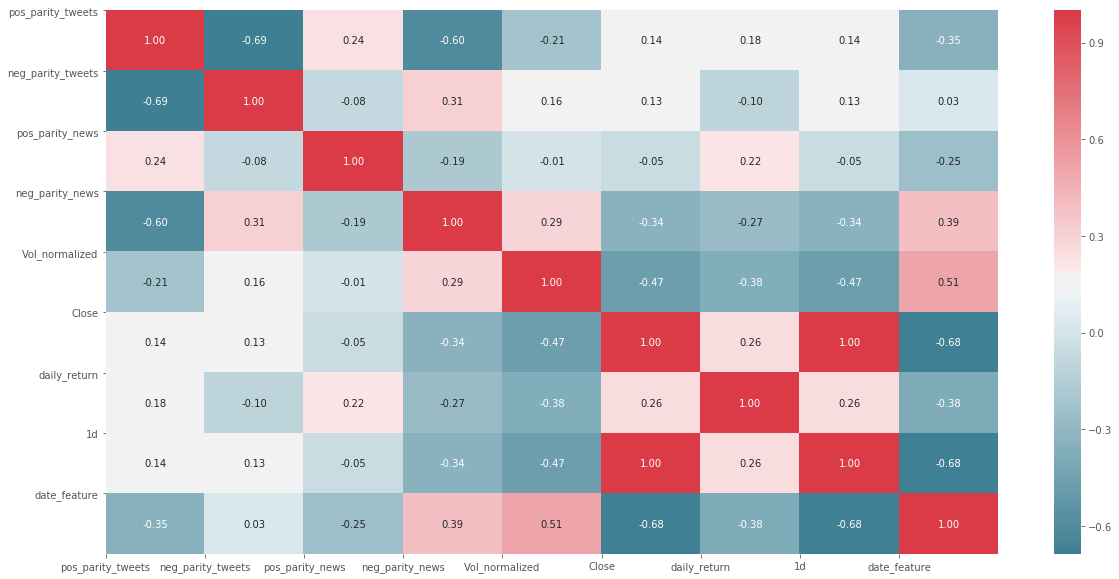

In [134]:
#Heat map to show correlation between attributes of the combined Dataframe.
fig, ax = plt.subplots(figsize=(20, 10))
corr1 = temp_datafile_comb[['pos_parity_tweets','neg_parity_tweets','pos_parity_news','neg_parity_news','Vol_normalized', 'Close','daily_return','1d','date_feature']].corr()
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr1,cmap=colormap, annot=True, fmt=".2f")
plt.xticks(range(len(corr1.columns)), corr1.columns,rotation=0)
plt.yticks(range(len(corr1.columns)), corr1.columns,rotation=0)
plt.show()

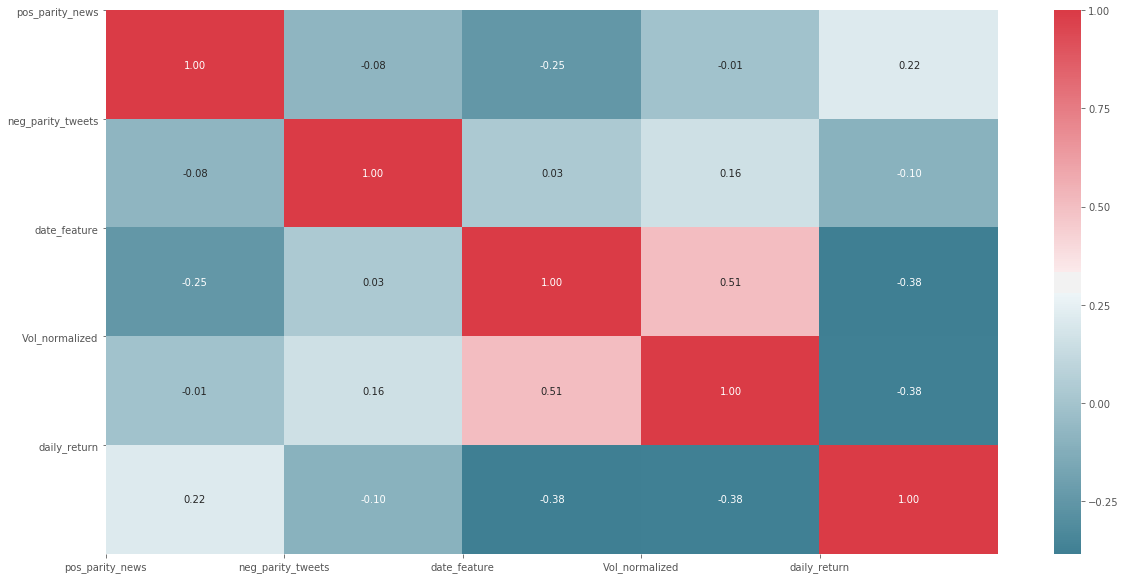

In [108]:
#Heat map to show correlation between significant attributes of the combined Dataframe.
fig, ax = plt.subplots(figsize=(20, 10))
corr = temp_datafile_comb[['pos_parity_news','neg_parity_tweets','date_feature','Vol_normalized','daily_return']].corr()
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr,cmap=colormap, annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns,rotation=0)
plt.yticks(range(len(corr.columns)), corr.columns,rotation=0)
plt.show()

### APPLIED ML

In [109]:
#Applying Simple Linear Regression Model

In [110]:
comb_model1 = sm.ols(formula="Close ~  pos_parity_news +  neg_parity_tweets + date_feature+ Vol_normalized+ daily_return", data=temp_datafile_comb).fit()

In [111]:
comb_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     6.121
Date:                Sun, 21 Apr 2019   Prob (F-statistic):           0.000783
Time:                        21:41:03   Log-Likelihood:                -80.779
No. Observations:                  31   AIC:                             173.6
Df Residuals:                      25   BIC:                             182.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           199.2819      2.715     73.392      0.000     193.690     204.874
pos_parity_news     -30.0019     21.401     -1.402      0.173     -74.077      14.073
neg_parity_tweets    98.0924     83.289      1.178      0.250     -73.445     269.630
date_feature         -1.0146      0.262     -3.874      0.001      -1.554      -0.475
Vol_normalized       -2.9316      2.814     -1.042      0.307      -8.727       2.864
daily_return          3.6107     61.999      0.058      0.954    -124.079     131.301
==============================================================================
Omnibus:                        1.858   Durbin-Watson:                   0.821
Prob(Omnibus):                  0.395   Jarque-Bera (JB):                1.209
Skew:                          -0.186   Prob(JB):                        0.546
Kurtosis:                       2.107   Cond. No.                         849.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [112]:
comb_model1.params

Intercept            199.281885
pos_parity_news      -30.001895
neg_parity_tweets     98.092421
date_feature          -1.014641
Vol_normalized        -2.931613
daily_return           3.610747
dtype: float64

In [113]:
model_plot1 = sm.ols(formula="Close ~  pos_parity_news +  neg_parity_tweets + date_feature+ Vol_normalized+ daily_return", data=temp_datafile_comb).fit()
par1 = dict(model_plot1.params)
print(par1) 

{'Intercept': 199.28188475195773, 'pos_parity_news': -30.00189474196685, 'neg_parity_tweets': 98.09242134047588, 'date_feature': -1.0146408960351643, 'Vol_normalized': -2.931612760899874, 'daily_return': 3.610746945358187}


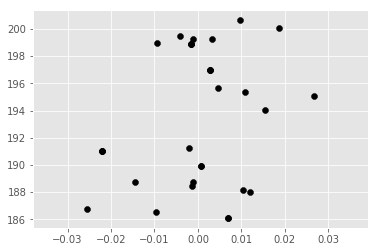

In [114]:
plt.scatter(temp_datafile_comb['daily_return'],temp_datafile_comb['Close'],color='black',label="data")
#plt.scatter(model_plot1['Close'],model_plot1['neg_parity_tweets'],color='black',label="data")
#plt.scatter(model_plot1['Close'],model_plot1['date_feature'],color='black',label="data")
#plt.scatter(model_plot1['Close'],model_plot1['Vol_normalized'],color='black',label="data")
#plt.scatter(model_plot1['Close'],model_plot1['daily_return'],color='black',label="data")

In [115]:
x = temp_datafile_comb['Close']
y1 = par1["Intercept"] + par1['pos_parity_news']*x + par1['neg_parity_tweets']*x+ par1['date_feature']*x+ par1['Vol_normalized']*x+ par1['daily_return']*x
#y2 = par1["Intercept"] + par1['neg_parity_tweets']*x
#y3 = par1["Intercept"] + par1['date_feature']*x
#y4 = par1["Intercept"] + par1['Vol_normalized']*x
#y5 = par1["Intercept"] + par1['daily_return']*x

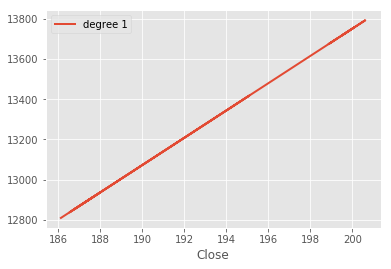

In [116]:
plt.plot(x,y1,label="degree 1",linewidth=2)
#plt.plot(x,y2,label="degree 2",linewidth=2)
#plt.plot(x,y3,label="degree 3",linewidth=2)
#plt.plot(x,y4,label="degree 4",linewidth=2)
#plt.plot(x,y5,label="degree 5",linewidth=2)
#plt.plot(x,y6,label="degree 6",linewidth=2)
plt.legend()
plt.xlabel('Close')
#plt.ylim((0,50))
plt.show()

In [117]:
#Applying Linear Regressor

In [118]:
X_x=temp_datafile_comb[['pos_parity_news','neg_parity_tweets','date_feature','Vol_normalized', 'daily_return']]
Y_y=temp_datafile_comb['Close']

In [119]:
# Train-Test Split for Cross Validation
X_train, X_test, y_train, y_test = train_test_split(X_x, Y_y, test_size=0.3, random_state=0)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
#print(metrics.accuracy_score(y_true=y_test, y_pred= y_pred))
#scores = cross_val_score(estimator=regressor, X=X_test, y=y_test, cv=10, scoring='accuracy')
#print(scores)

In [120]:
y_pred = regressor.predict(X_test)
print('Linear Regression R squared": %.4f' % regressor.score(X_test, y_test))

Linear Regression R squared": 0.6004


In [121]:
print('Coefficients: \n', regressor.coef_)
regressor.get_params()

Coefficients: 
 [-31.84437539  99.9088821   -0.88226911  -2.00607349  23.3079201 ]


{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False}

In [132]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(verbose=0)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [133]:
print('Random Forest R squared": %.4f' % forest_reg.score(X_test, y_test))

Random Forest R squared": 0.8960
